# Statistics TABA - 23112573
## Part A - Time Series Analysis
## Weather Dataset

> Important Imports for Further Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from pylab import rcParams
import plotly.graph_objs as go
import plotly.figure_factory as ff
from statsmodels.tsa.arima.model import SARIMAXSpecification
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [2]:
weather_df = pd.read_csv("./Data files for TABA-20231221/weather_revised.csv")

In [3]:
weather_df.head()

date  maxtp(Maximum Air Temperature - degrees C)  \
0  1-Jan-42                                         9.7   
1  2-Jan-42                                         9.9   
2  3-Jan-42                                        11.2   
3  4-Jan-42                                         9.2   
4  5-Jan-42                                         3.5   

   mintp(Minimum Air Temperature - degrees C)  \
0                                         6.8   
1                                         7.9   
2                                         8.9   
3                                         2.7   
4                                        -0.8   

  gmin(Grass Minimum Temperature - degrees C)  \
0                                         4.7   
1                                         6.7   
2                                         7.2   
3                                         3.4   
4                                           0   

   rain(Precipitation Amount - mm)  cbl (Mean CBL Pressure-hpa)  \
0                              0.0                       1020.3   
1                              0.1                       1016.2   
2                              1.5                       1006.8   
3                              3.5                       1001.5   
4                              0.6                       1013.4   

   wdsp(Mean Wind Speed - knot)  pe(Potential Evapotranspiration - mm)  \
0                          17.2                                    1.1   
1                          15.2                                    0.7   
2                          14.0                                    0.5   
3                          17.0                                    0.6   
4                          13.0                                    0.6   

  evap(Evaporation -mm)  
0                   1.4  
1                   0.9  
2                   0.6  
3                   0.7  
4                   0.7

In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29889 entries, 0 to 29888
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   date                                         29889 non-null  object 
 1   maxtp(Maximum Air Temperature - degrees C)   29889 non-null  float64
 2   mintp(Minimum Air Temperature - degrees C)   29889 non-null  float64
 3   gmin(Grass Minimum Temperature - degrees C)  29889 non-null  object 
 4   rain(Precipitation Amount - mm)              29889 non-null  float64
 5   cbl (Mean CBL Pressure-hpa)                  29889 non-null  float64
 6   wdsp(Mean Wind Speed - knot)                 29889 non-null  float64
 7   pe(Potential Evapotranspiration - mm)        29889 non-null  float64
 8   evap(Evaporation -mm)                        29889 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.1+ MB


# Data Preparation

### Converting the date column to Datetime
> The date column as provided is initially in a object format, that needs to be converted into datetime format for Time Series Analysis. 

In [5]:
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [6]:
weather_df['date']

0       2042-01-01
1       2042-01-02
2       2042-01-03
3       2042-01-04
4       2042-01-05
           ...    
29884   2023-10-27
29885   2023-10-28
29886   2023-10-29
29887   2023-10-30
29888   2023-10-31
Name: date, Length: 29889, dtype: datetime64[ns]

In [7]:
weather_df[28180:28188]

date  maxtp(Maximum Air Temperature - degrees C)  \
28180 2019-02-26                                        14.5   
28181 2019-02-27                                        13.2   
28182 2019-02-28                                        11.2   
28183 2019-03-01                                        15.0   
28184 2019-03-02                                        12.4   
28185 2019-03-03                                         7.0   
28186 2019-03-04                                         6.8   
28187 2019-03-05                                        10.6   

       mintp(Minimum Air Temperature - degrees C)  \
28180                                        -0.8   
28181                                        -1.9   
28182                                         5.3   
28183                                         5.0   
28184                                         5.0   
28185                                        -0.2   
28186                                         0.7   
28187                                         3.3   

      gmin(Grass Minimum Temperature - degrees C)  \
28180                                        -4.9   
28181                                        -5.7   
28182                                         3.4   
28183                                         3.9   
28184                                         2.9   
28185                                         3.6   
28186                                        -0.8   
28187                                         1.1   

       rain(Precipitation Amount - mm)  cbl (Mean CBL Pressure-hpa)  \
28180                              0.0                       1018.5   
28181                              0.0                       1011.0   
28182                              0.2                       1005.5   
28183                              5.9                       1003.4   
28184                              2.6                        991.4   
28185                             22.0                        979.7   
28186                              0.6                        981.0   
28187                             13.3                        979.8   

       wdsp(Mean Wind Speed - knot)  pe(Potential Evapotranspiration - mm)  \
28180                           4.7                                    1.1   
28181                           4.5                                    0.8   
28182                           6.3                                    0.7   
28183                           5.9                                    1.2   
28184                          12.2                                    1.1   
28185                          10.3                                    0.7   
28186                          10.2                                    0.7   
28187                          12.9                                    1.2   

      evap(Evaporation -mm)  
28180                   1.5  
28181                   1.2  
28182                   0.9  
28183                   1.7  
28184                   1.4  
28185                     1  
28186                   1.2  
28187                   1.7

In [8]:
weather_df[11320:11325]

date  maxtp(Maximum Air Temperature - degrees C)  \
11320 2072-12-29                                         7.2   
11321 2072-12-30                                        11.1   
11322 2072-12-31                                        11.4   
11323 1973-01-01                                        11.5   
11324 1973-01-02                                        11.7   

       mintp(Minimum Air Temperature - degrees C)  \
11320                                         0.1   
11321                                         6.5   
11322                                         9.1   
11323                                         9.7   
11324                                         8.2   

      gmin(Grass Minimum Temperature - degrees C)  \
11320                                        -3.4   
11321                                        -1.2   
11322                                         6.6   
11323                                           9   
11324                                         8.1   

       rain(Precipitation Amount - mm)  cbl (Mean CBL Pressure-hpa)  \
11320                              0.0                       1011.2   
11321                              0.3                       1013.1   
11322                              0.5                       1009.7   
11323                              0.0                       1009.4   
11324                              0.3                       1013.1   

       wdsp(Mean Wind Speed - knot)  pe(Potential Evapotranspiration - mm)  \
11320                           6.5                                    0.0   
11321                           9.4                                    0.8   
11322                          12.4                                    0.7   
11323                          15.0                                    0.8   
11324                          14.7                                    0.6   

      evap(Evaporation -mm)  
11320                     0  
11321                   0.9  
11322                   0.8  
11323                     1  
11324                   0.7

## Insights on initial Data
> The data initially as shown above has some mistakes, where the dataset has some wrong date values after comversion into datetime format. The index range of the mistake is fetched from above and is dropped by a century for data cleaning purpose as done below.

In [9]:
weather_df.loc[0:11322, 'date'] -= pd.DateOffset(years=100)

In [10]:
weather_df[21184:21190]

date  maxtp(Maximum Air Temperature - degrees C)  \
21184 2000-01-01                                         8.0   
21185 2000-01-02                                        11.3   
21186 2000-01-03                                        10.5   
21187 2000-01-04                                         8.4   
21188 2000-01-05                                        12.0   
21189 2000-01-06                                         8.7   

       mintp(Minimum Air Temperature - degrees C)  \
21184                                         0.0   
21185                                         5.2   
21186                                         1.7   
21187                                         1.6   
21188                                         4.4   
21189                                         3.5   

      gmin(Grass Minimum Temperature - degrees C)  \
21184                                        -6.3   
21185                                        -4.7   
21186                                         0.1   
21187                                        -4.5   
21188                                        -1.3   
21189                                         0.8   

       rain(Precipitation Amount - mm)  cbl (Mean CBL Pressure-hpa)  \
21184                              0.1                       1012.0   
21185                              0.3                       1004.8   
21186                              0.3                       1000.9   
21187                              4.3                        996.8   
21188                              0.1                        990.0   
21189                              0.0                        993.3   

       wdsp(Mean Wind Speed - knot)  pe(Potential Evapotranspiration - mm)  \
21184                           7.6                                    0.2   
21185                          12.0                                    0.5   
21186                          10.9                                    0.5   
21187                          13.7                                    0.7   
21188                          21.4                                    1.3   
21189                          15.7                                    0.7   

      evap(Evaporation -mm)  
21184                   0.2  
21185                   0.6  
21186                   0.6  
21187                   0.8  
21188                   1.8  
21189                   0.8

In [11]:
weather_df['date'][11318:11325]

11318   1972-12-27
11319   1972-12-28
11320   1972-12-29
11321   1972-12-30
11322   1972-12-31
11323   1973-01-01
11324   1973-01-02
Name: date, dtype: datetime64[ns]

In [12]:
weather_df

date  maxtp(Maximum Air Temperature - degrees C)  \
0     1942-01-01                                         9.7   
1     1942-01-02                                         9.9   
2     1942-01-03                                        11.2   
3     1942-01-04                                         9.2   
4     1942-01-05                                         3.5   
...          ...                                         ...   
29884 2023-10-27                                        13.2   
29885 2023-10-28                                        14.1   
29886 2023-10-29                                        12.4   
29887 2023-10-30                                        12.7   
29888 2023-10-31                                        12.3   

       mintp(Minimum Air Temperature - degrees C)  \
0                                             6.8   
1                                             7.9   
2                                             8.9   
3                                             2.7   
4                                            -0.8   
...                                           ...   
29884                                         4.1   
29885                                         9.3   
29886                                         2.5   
29887                                         1.7   
29888                                         4.4   

      gmin(Grass Minimum Temperature - degrees C)  \
0                                             4.7   
1                                             6.7   
2                                             7.2   
3                                             3.4   
4                                               0   
...                                           ...   
29884                                          -1   
29885                                         7.2   
29886                                        -1.2   
29887                                        -1.3   
29888                                         0.8   

       rain(Precipitation Amount - mm)  cbl (Mean CBL Pressure-hpa)  \
0                                  0.0                       1020.3   
1                                  0.1                       1016.2   
2                                  1.5                       1006.8   
3                                  3.5                       1001.5   
4                                  0.6                       1013.4   
...                                ...                          ...   
29884                              2.9                        974.2   
29885                              4.4                        970.1   
29886                             11.1                        972.0   
29887                              2.1                        979.9   
29888                              4.2                        983.2   

       wdsp(Mean Wind Speed - knot)  pe(Potential Evapotranspiration - mm)  \
0                              17.2                                    1.1   
1                              15.2                                    0.7   
2                              14.0                                    0.5   
3                              17.0                                    0.6   
4                              13.0                                    0.6   
...                             ...                                    ...   
29884                           5.8                                    0.5   
29885                           8.5                                    0.7   
29886                           5.2                                    0.4   
29887                           4.1                                    0.3   
29888                           6.8                                    0.4   

      evap(Evaporation -mm)  
0                       1.4  
1                       0.9  
2                       0.6  
3                       0.7  
4                       0.7  

In [13]:
weather_df.to_csv('./fixed_weather.csv')

In [14]:
weather_df.isna().sum()

date                                           0
maxtp(Maximum Air Temperature - degrees C)     0
mintp(Minimum Air Temperature - degrees C)     0
gmin(Grass Minimum Temperature - degrees C)    0
rain(Precipitation Amount - mm)                0
cbl (Mean CBL Pressure-hpa)                    0
wdsp(Mean Wind Speed - knot)                   0
pe(Potential Evapotranspiration - mm)          0
evap(Evaporation -mm)                          0
dtype: int64

# Choosing the Variable - 
As per the Brief: My student ID is- **23112573**, so the last digit being **'3'** the variable we use is : **mintp**

In [15]:
tsa_df = weather_df[['date','mintp(Minimum Air Temperature - degrees C)']].copy()

In [16]:
tsa_df

date  mintp(Minimum Air Temperature - degrees C)
0     1942-01-01                                         6.8
1     1942-01-02                                         7.9
2     1942-01-03                                         8.9
3     1942-01-04                                         2.7
4     1942-01-05                                        -0.8
...          ...                                         ...
29884 2023-10-27                                         4.1
29885 2023-10-28                                         9.3
29886 2023-10-29                                         2.5
29887 2023-10-30                                         1.7
29888 2023-10-31                                         4.4

[29889 rows x 2 columns]

In [17]:
tsa_df.rename(columns={'mintp(Minimum Air Temperature - degrees C)':'mintp'},inplace=True)

In [18]:
tsa_df.index = tsa_df['date']

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

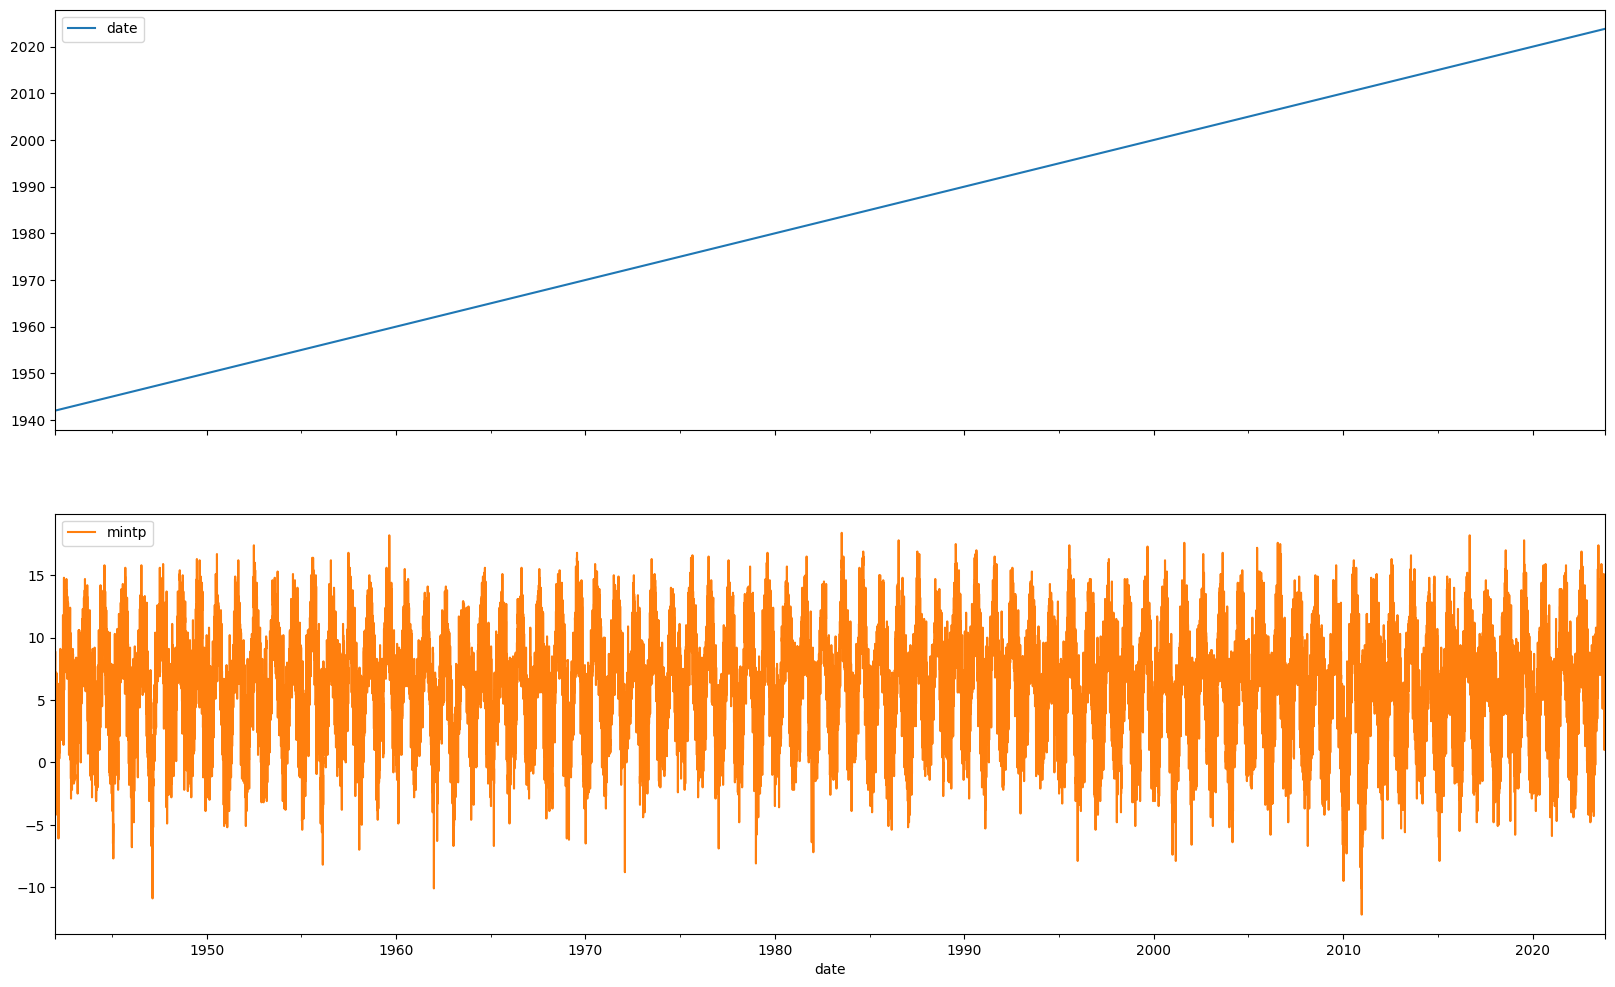

In [19]:
tsa_df.plot(subplots=True, figsize=(20,12))

<Axes: xlabel='date'>

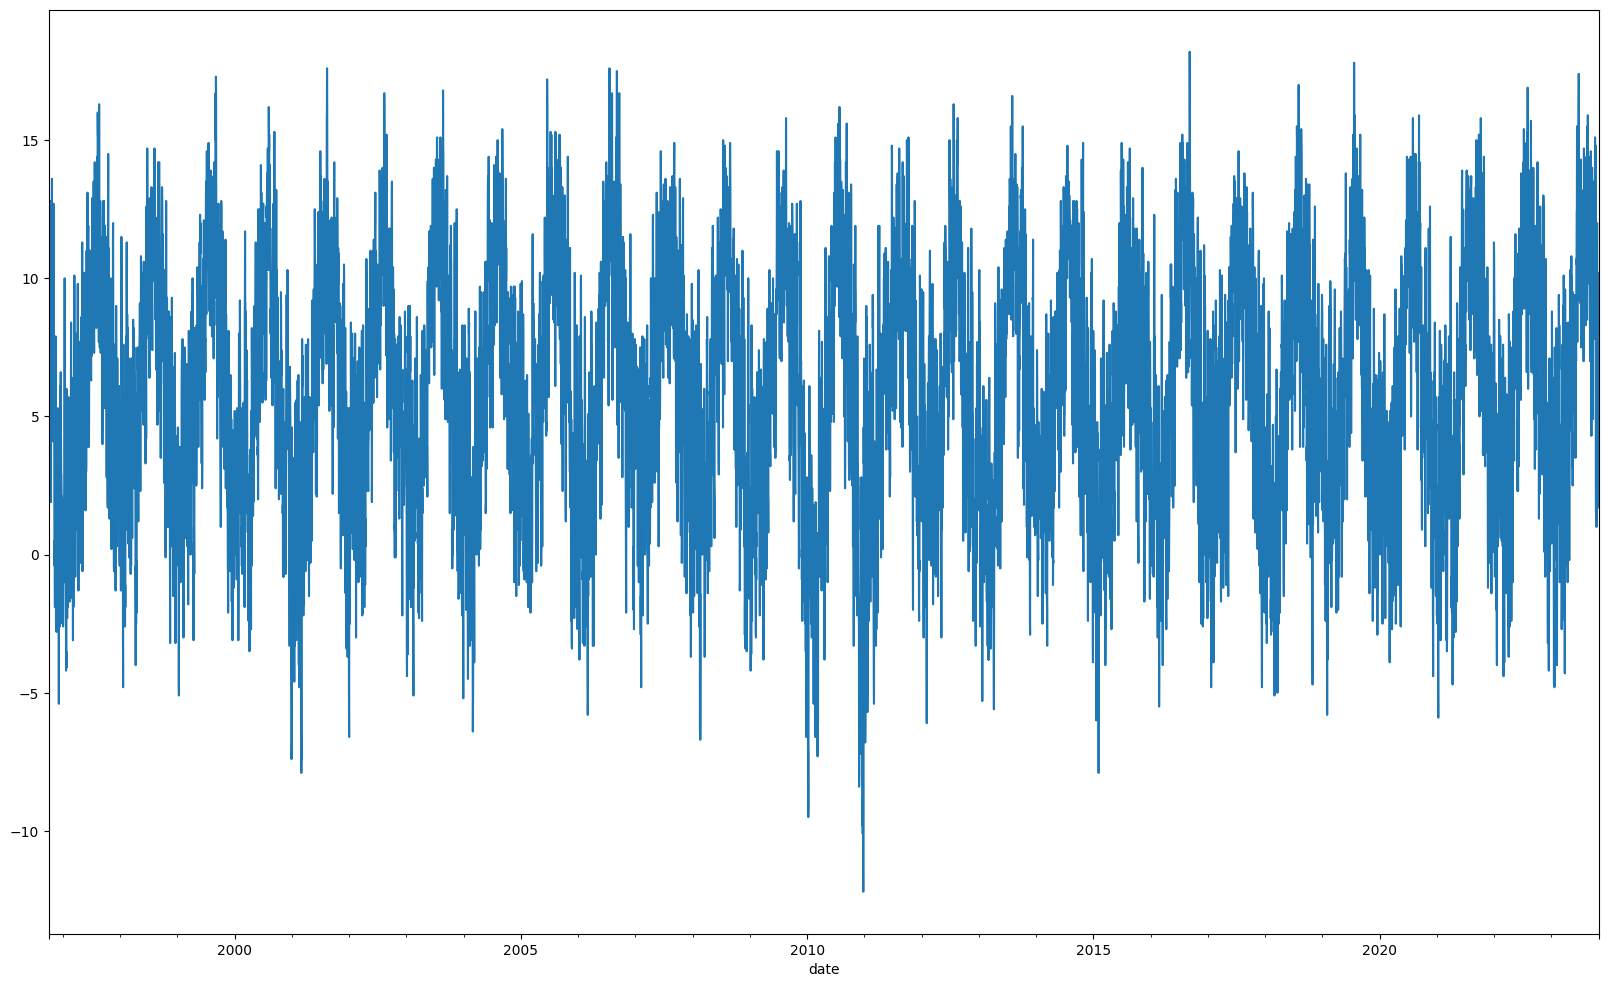

In [20]:
tsa_df['mintp'][20000:].plot(figsize=(20,12))

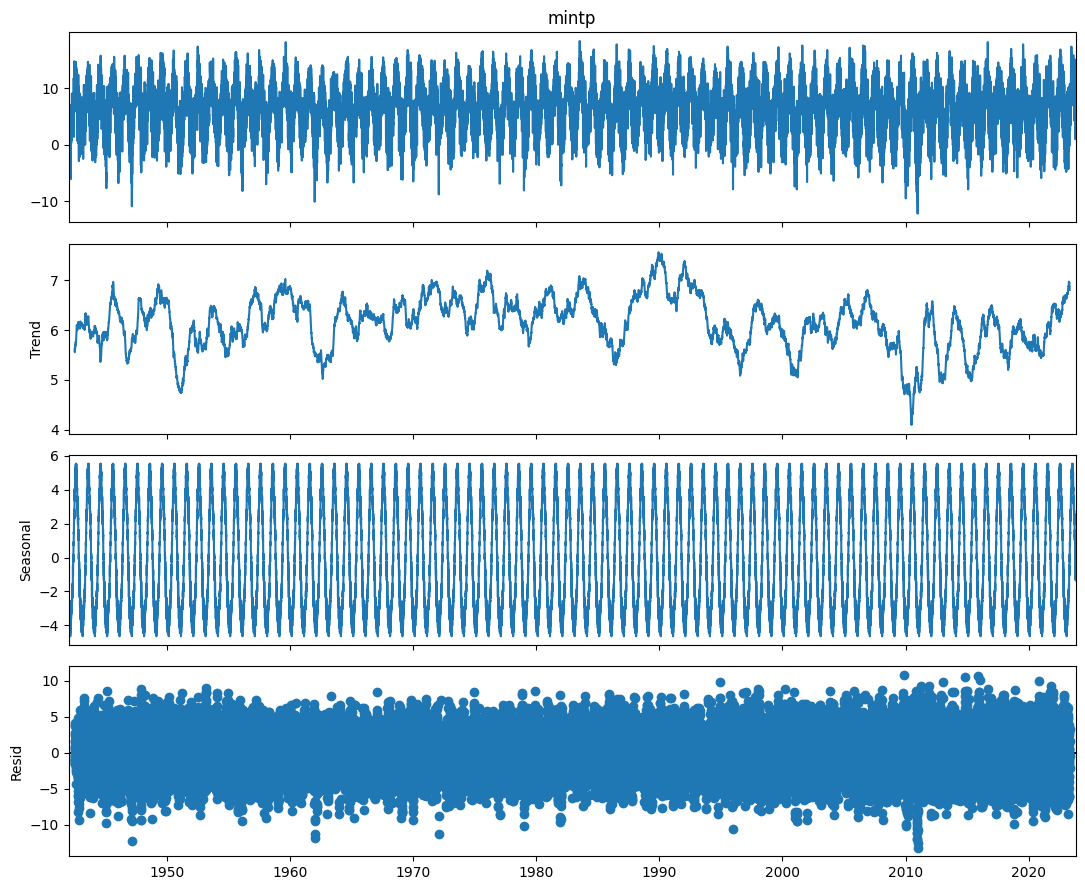

In [21]:
rcParams['figure.figsize'] = 11, 9
decomposed_tsa_volume = sm.tsa.seasonal_decompose(tsa_df["mintp"],period=365) # The frequncy is annual
figure = decomposed_tsa_volume.plot()
plt.show()

In [22]:
decomposed_tsa_volume.observed

date
1942-01-01    6.8
1942-01-02    7.9
1942-01-03    8.9
1942-01-04    2.7
1942-01-05   -0.8
             ... 
2023-10-27    4.1
2023-10-28    9.3
2023-10-29    2.5
2023-10-30    1.7
2023-10-31    4.4
Name: mintp, Length: 29889, dtype: float64

## Stationarity:

- Null Hypothesis Testing for Augmented Dickey-Fuller Test
- Rolling Mean and Standard Deviation

In [122]:
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

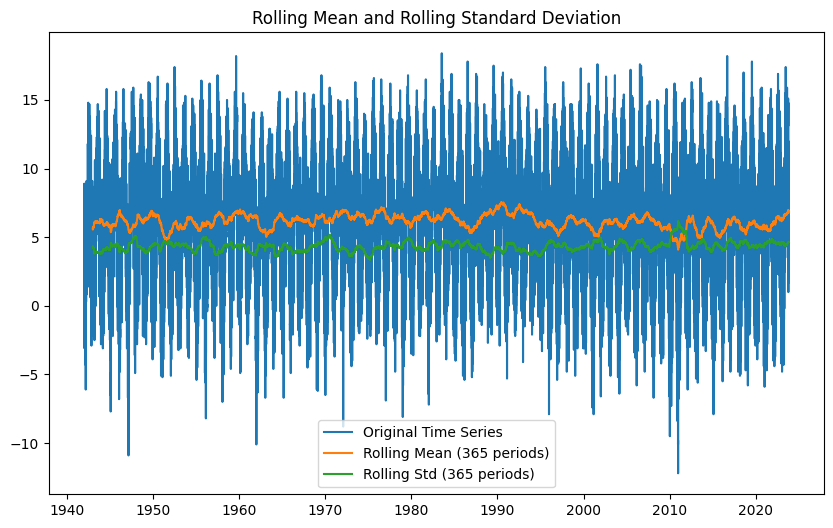

In [24]:
# Rolling mean and Standard Deviation
window_size = 365
rolling_mean = tsa_df['mintp'][:].rolling(window=window_size).mean()
rolling_std = tsa_df['mintp'][:].rolling(window=window_size).std()

# Plots for the original time series and the rolling mean and rolling standard deviation
plt.figure(figsize=(10, 6))
plt.plot(tsa_df['mintp'][:], label='Original Time Series')
plt.plot(rolling_mean, label=f'Rolling Mean ({window_size} periods)')
plt.plot(rolling_std, label=f'Rolling Std ({window_size} periods)')

plt.title('Rolling Mean and Rolling Standard Deviation')
plt.legend()
plt.show()

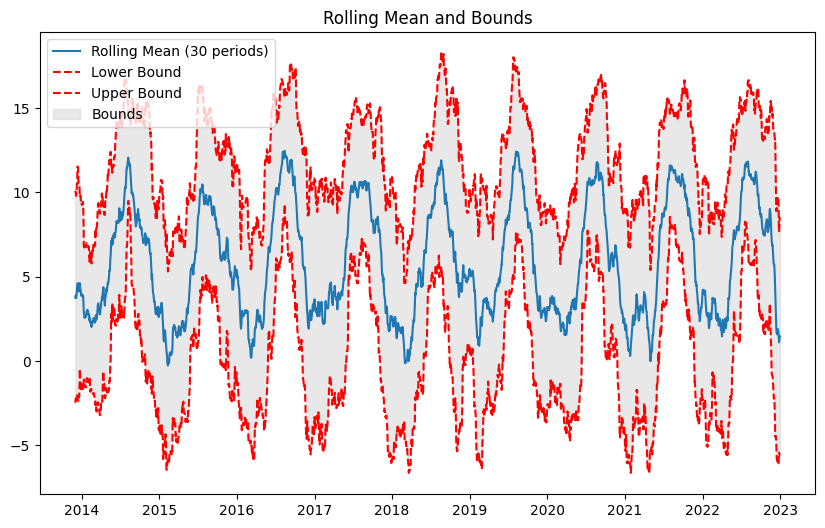

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate rolling mean and rolling standard deviation
window_size = 30 
rolling_mean = tsa_df['mintp'][-3650:-304].rolling(window=window_size).mean()
rolling_std = tsa_df['mintp'][-3650:-304].rolling(window=window_size).std()

# Calculate lower and upper bounds
lower_bound = rolling_mean - 2 * rolling_std
upper_bound = rolling_mean + 2 * rolling_std

# Plots for the original time series, rolling mean, and bounds
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean, label=f'Rolling Mean ({window_size} periods)')
plt.plot(lower_bound, label='Lower Bound', linestyle='--', color='red')
plt.plot(upper_bound, label='Upper Bound', linestyle='--', color='red')

plt.fill_between(rolling_mean.index, lower_bound, upper_bound, color='lightgray', alpha=0.5, label='Bounds')

plt.title('Rolling Mean and Bounds')
plt.legend()
plt.show()

In [26]:
perform_dickey_fuller_test(tsa_df['mintp'])

Test statistic:  -12.98365232195235
Critical Values: {'1%': -3.4305691789885526, '5%': -2.8616368711691322, '10%': -2.5668215615705376}


From the above mean and standard deviation it is evident that there is staionarity in data


## ADF Test Result and Visualization Inference
*Result Shows:*

    ADF Statistic: -12.98365232195235
    Critical Values:
-       1% Critical Value: -3.4306235372544926
-       5% Critical Value: -2.8616608949415774
-       10% Critical Value: -2.566834348884819

*The ADF Statistic is more negative than all of the critical values:*

-       ADF Statistic (-12.98365232195235) < 1% Critical Value (-3.4306)
-       ADF Statistic (-12.98365232195235) < 5% Critical Value (-2.8617)
-       ADF Statistic (-12.98365232195235) < 10% Critical Value (-2.5668)
    
> **Hence we can easily reject the null hypothesis of non-stationarity and conclude that the data is stationary.**

> **From the Visualization above - Standard Deviation seems constant i.e. variance seems constant(green line), so we can say data seems sationary**

> **Our last checkpoint for stationary the mean being constant. The mean seems to be constant as seen from plot(orange line) above . (Hence stationary)**

## Seasonal Visualization

<Axes: xlabel='date'>

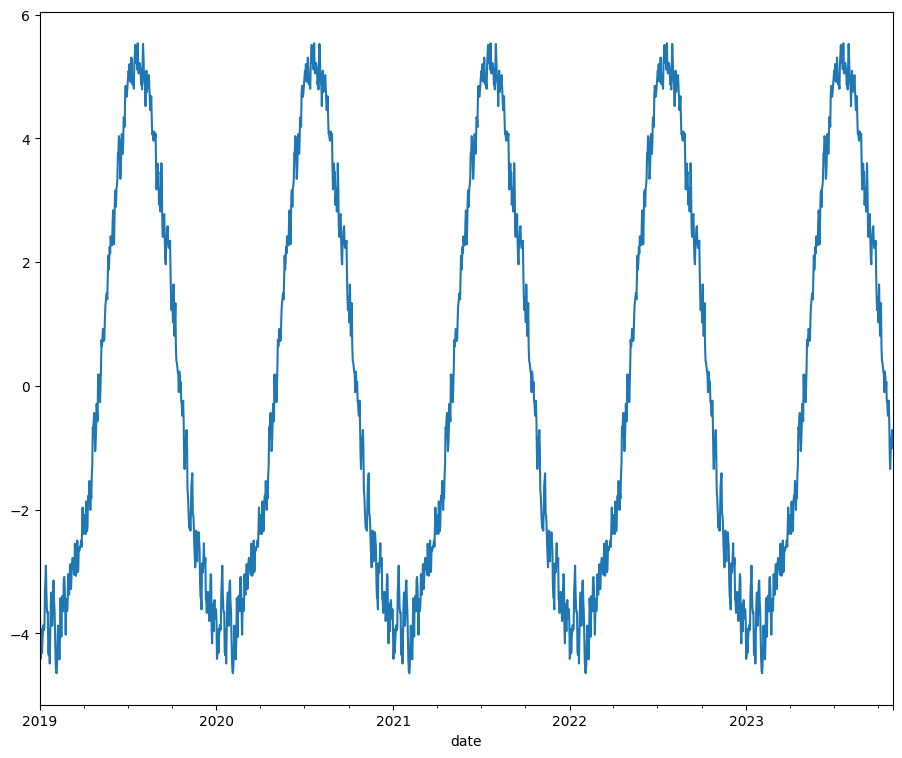

In [27]:
decomposed_tsa_volume.seasonal[-1765:].plot()

## Seasonal Inference:
>The min temperature seems to rise the most as expected during the summers and drop down during winters.

Also, it is quite evident that the seasonality repeats over time of 365 days that is annually repeating. So while smoothening the data exponentially over time the period of smoothening should be 365 days.

# Modelling

## Simple Time Series Analysis - Rolling Mean forecasting

In [28]:
rolling_mean[-304:]

date
2023-01-01    6.185479
2023-01-02    6.164384
2023-01-03    6.173973
2023-01-04    6.198904
2023-01-05    6.219452
                ...   
2023-10-27    6.868493
2023-10-28    6.869589
2023-10-29    6.846849
2023-10-30    6.820822
2023-10-31    6.806575
Name: mintp, Length: 304, dtype: float64

In [29]:
# Step 1: Divide the data into train and test sets
train, test = tsa_df[-1765:-304], tsa_df[-304:]

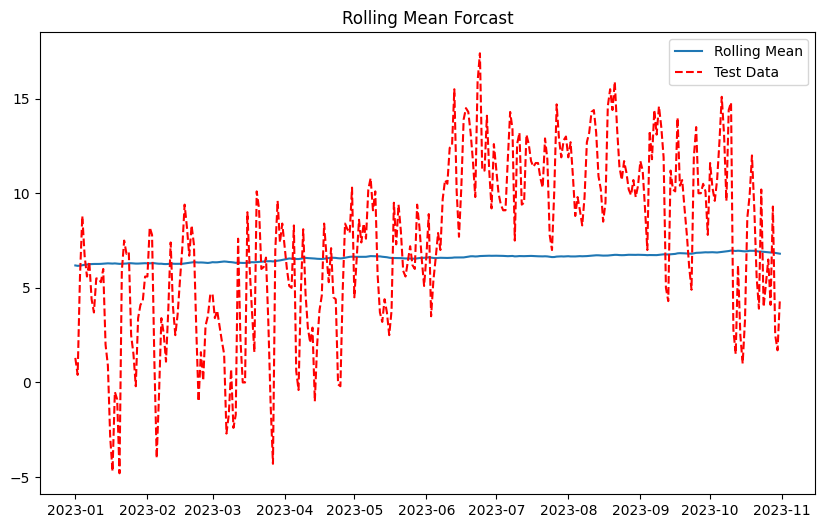

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean[-304:], label=f'Rolling Mean')
plt.plot(test['mintp'], label='Test Data', linestyle='--', color='red')
plt.title('Rolling Mean Forcast')
plt.legend()
plt.show()

In [31]:
rolling_mse = mean_squared_error(test['mintp'], rolling_mean[-304:])
print(f'Mean Squared Error on Test Set: {rolling_mse}')

Mean Squared Error on Test Set: 19.737856308332756


## Exponential Smoothing 

In [169]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt, SimpleExpSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit

# Assuming you have a time series dataset in a DataFrame with a 'timestamp' and 'value' column
# Replace 'your_dataframe' with the actual name of your DataFrame

# Step 1: Divide the data into train and test sets
train, test = tsa_df[-1765:-304], tsa_df[-304:]

In [170]:
train.head()

date  mintp
date                        
2019-01-01 2019-01-01    1.8
2019-01-02 2019-01-02    1.6
2019-01-03 2019-01-03    4.9
2019-01-04 2019-01-04    4.6
2019-01-05 2019-01-05    2.0

Mean Squared Error on Test Set: 23.494219181576863


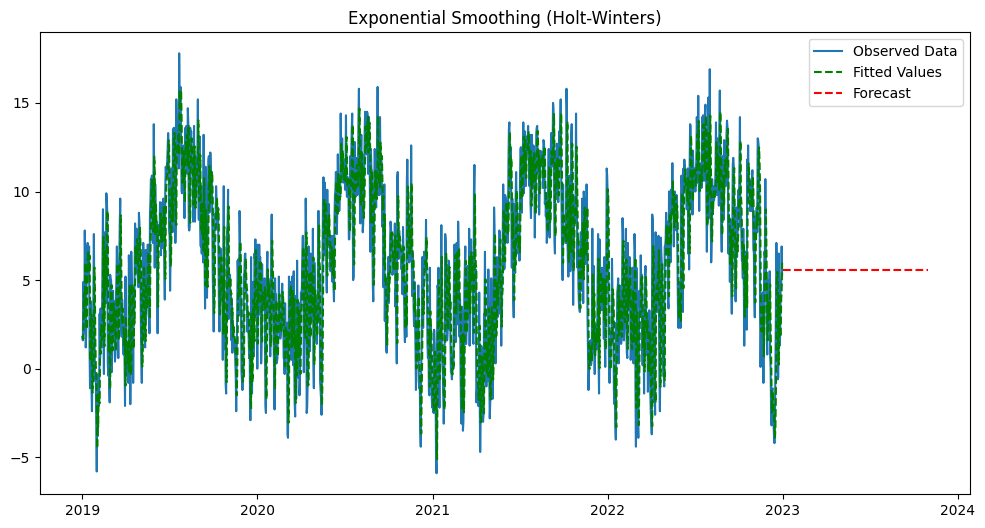

In [173]:
model = SimpleExpSmoothing(train['mintp'])
fit_ets = model.fit()


plt.figure(figsize=(12, 6))
plt.plot(train['mintp'], label='Observed Data')
plt.plot(fit_ets.fittedvalues, label='Fitted Values', linestyle='--', color='green')
forecast_ets = fit_ets.forecast(steps=len(test['mintp']))

mse = mean_squared_error(test['mintp'], forecast_ets)
print(f'Mean Squared Error on Test Set: {mse}')

plt.plot(forecast_ets, label='Forecast', linestyle='--', color='red')
plt.title('Exponential Smoothing (Holt-Winters)')
plt.legend()
plt.show()

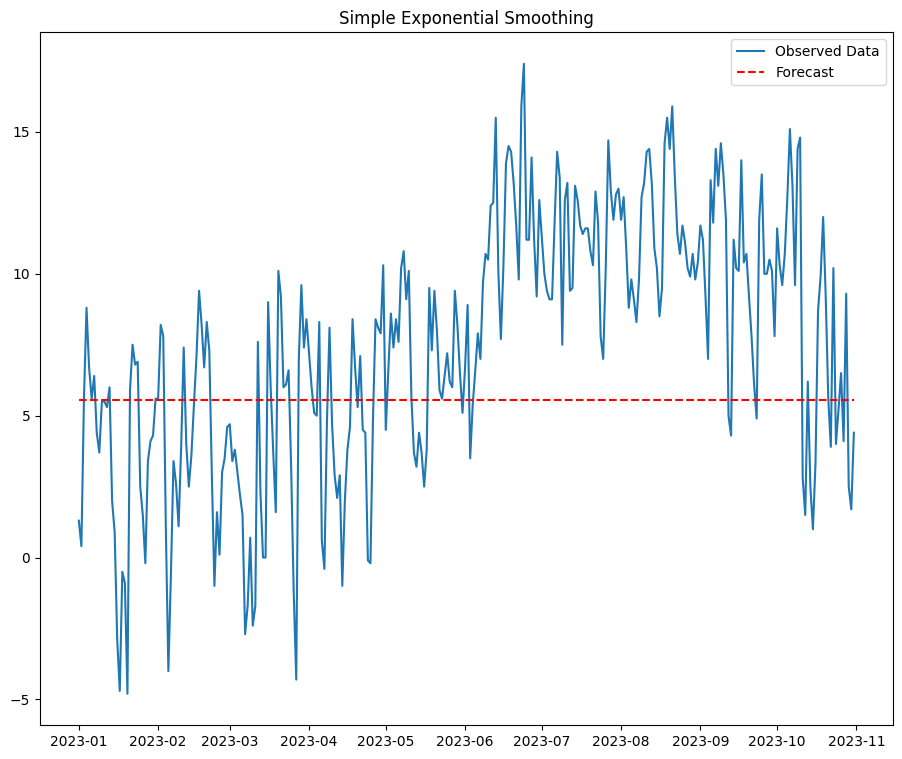

In [176]:
plt.plot(test['mintp'], label='Observed Data')
plt.plot(forecast_ets, label='Forecast', linestyle='--', color='red')
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()

In [177]:
fit_ets.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                  mintp   No. Observations:                 1461
Model:             SimpleExpSmoothing   SSE                          11680.067
Optimized:                       True   AIC                           3041.072
Trend:                           None   BIC                           3051.646
Seasonal:                        None   AICC                          3041.100
Seasonal Periods:                None   Date:                 Sat, 30 Dec 2023
Box-Cox:                        False   Time:                         16:03:41
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.6343376                alpha                 True
initial_level              1.8000000                  l.0                False
------------------------------------------------------------------------------
"""

### Jarque-Bera Test

In [178]:
jb_stat, jb_p_value, _, _ = jarque_bera(fit_ets.resid)
print(f"Jarque-Bera Test Statistic: {jb_stat}")
print(f"P-value: {jb_p_value}")

Jarque-Bera Test Statistic: 34.44434613572216
P-value: 3.3151659280357396e-08


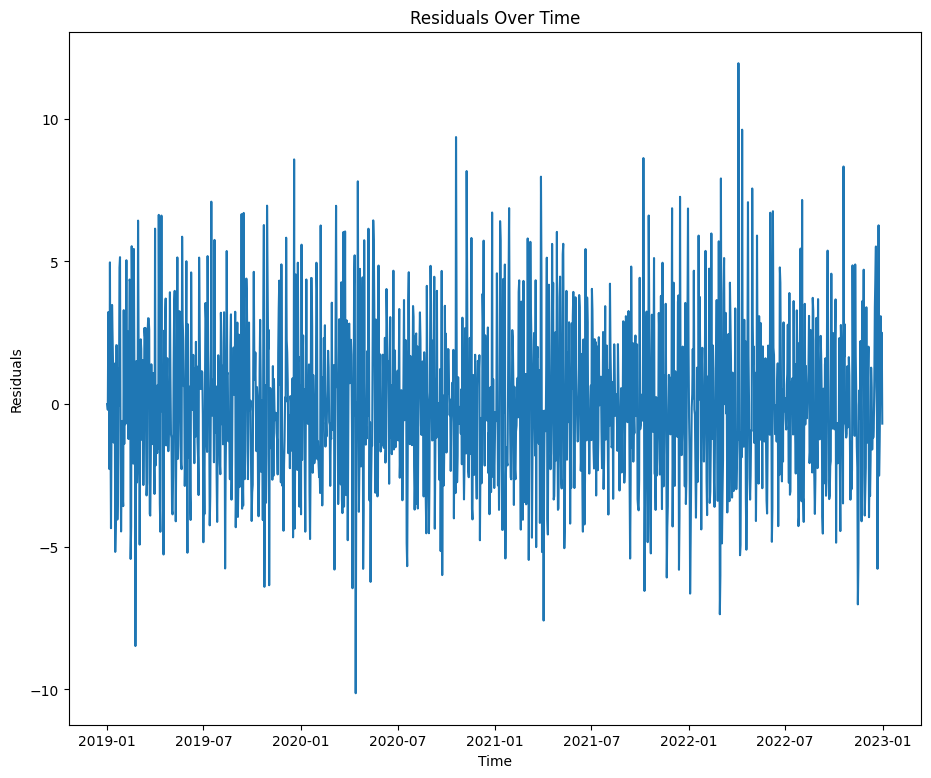

In [194]:
plt.plot(fit_ets.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals Over Time')
plt.show()

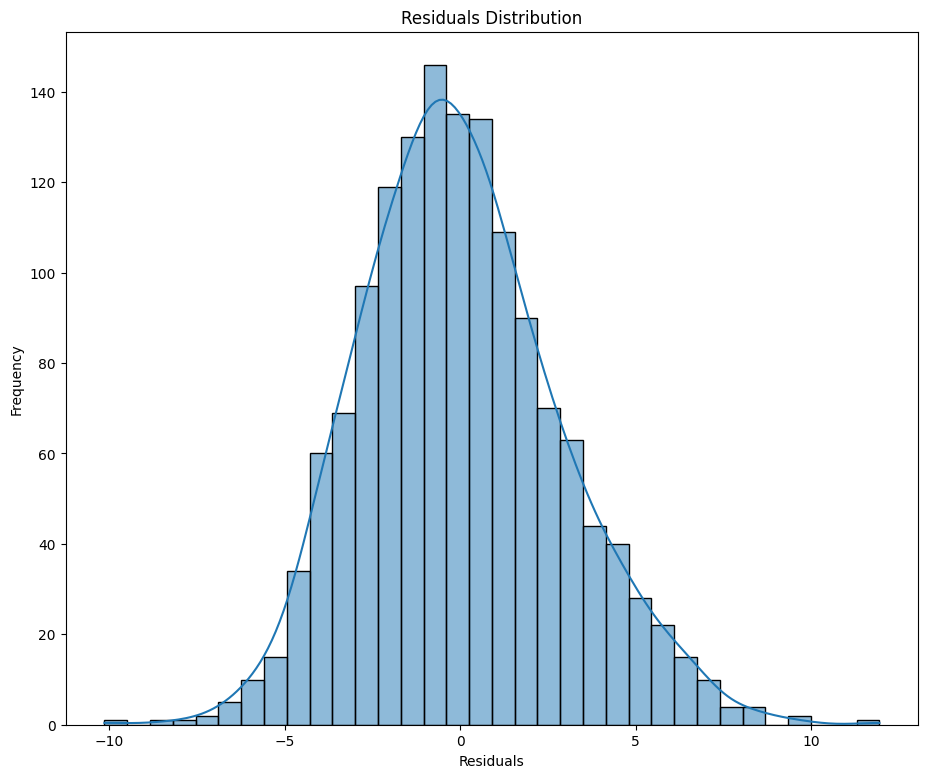

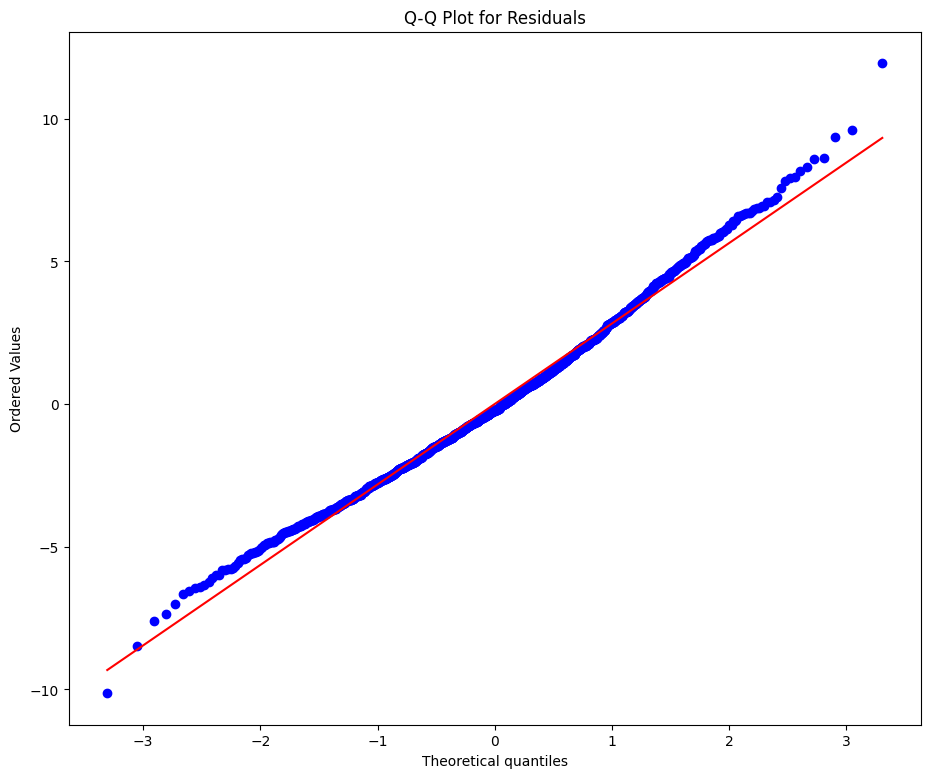

In [196]:
from scipy.stats import probplot
sns.histplot(fit_ets.resid, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

# Q-Q plot
probplot(fit_ets.resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()

### Inference on Exponential Smoothing:
> The **MSE** value obtained with just normal exponential smoothing is **23.494219181576863**.

## Tripple Exponential Smoothening

Mean Squared Error on Test Set: 11.058754236758848


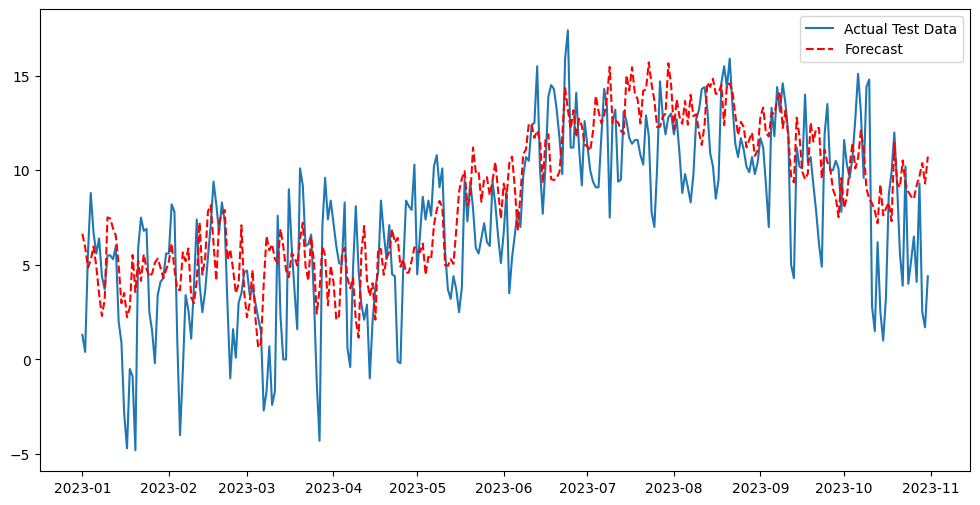

In [149]:
alpha = 0.6559994  # Smoothing parameter for the level
beta = 0  # Smoothing parameter for the trend
gamma = 7.8162e-09 # Smoothing parameter for seasonality

seasonal_period = 365

model = ExponentialSmoothing(train['mintp'], seasonal='add', seasonal_periods=seasonal_period)
fit_model = model.fit(optimized=True)
#fit_model = model.fit()

# Step 5: Forecast using the fitted model on the test set
forecast_values = fit_model.forecast(steps=len(test['mintp']))

# Step 6: Evaluate the model performance on the test set
mse = mean_squared_error(test['mintp'], forecast_values)
print(f'Mean Squared Error on Test Set: {mse}')

# Step 7: Plot the results
plt.figure(figsize=(12, 6))
#plt.plot(train['date'], train['mintp'], label='Training Data')
plt.plot(test['date'], test['mintp'], label='Actual Test Data')
plt.plot(test['date'], forecast_values, label='Forecast', linestyle='--', color='red')
plt.legend()
plt.show()

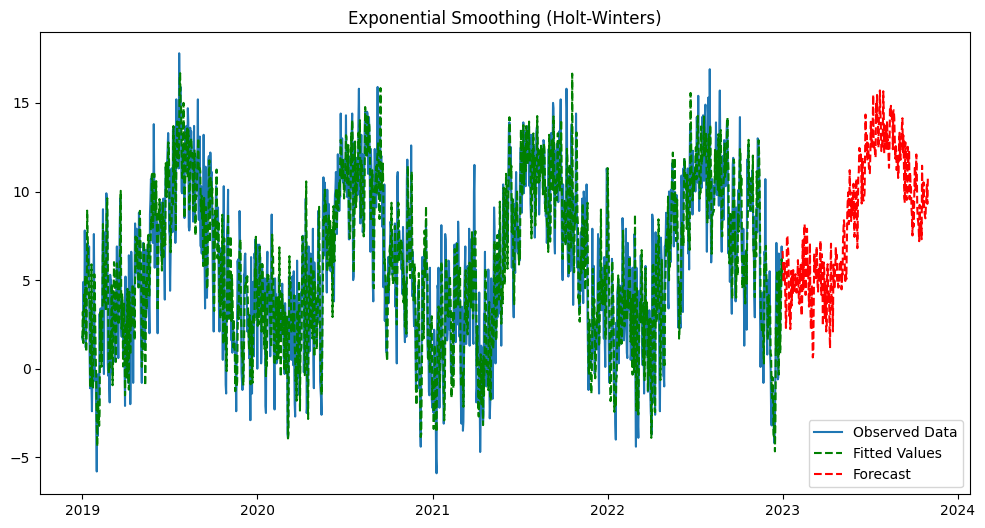

In [175]:
plt.figure(figsize=(12, 6))
plt.plot(train['mintp'], label='Observed Data')
plt.plot(fit_model.fittedvalues, label='Fitted Values', linestyle='--', color='green')


plt.plot(forecast_values, label='Forecast', linestyle='--', color='red')
plt.title('Exponential Smoothing (Holt-Winters)')
plt.legend()
plt.show()

## Tripple Exponential Smoothing Result

In [150]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    mintp   No. Observations:                 1461
Model:             ExponentialSmoothing   SSE                           8880.330
Optimized:                         True   AIC                           3370.692
Trend:                             None   BIC                           5310.976
Seasonal:                      Additive   AICC                          3620.977
Seasonal Periods:                   365   Date:                 Sat, 30 Dec 2023
Box-Cox:                          False   Time:                         03:39:00
Box-Cox Coeff.:                    None                                         
==================================================================================
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.6559994                alpha                 True
smoothing_seasonal            7.8162e-09                gamma                 True
initial_level                  4.5436588                  l.0                 True
initial_seasons.0             -2.8259870                  s.0                 True
initial_seasons.1             -1.3828258                  s.1                 True
initial_seasons.2             -2.0891898                  s.2                 True
initial_seasons.3             -3.1707054                  s.3                 True
initial_seasons.4             -2.7775669                  s.4                 True
initial_seasons.5             -2.0599278                  s.5                 True
initial_seasons.6             -3.1170350                  s.6                 True
initial_seasons.7             -4.5738684                  s.7                 True
initial_seasons.8             -5.7306481                  s.8                 True
initial_seasons.9             -4.8625593                  s.9                 True
initial_seasons.10            -0.5198301                 s.10                 True
initial_seasons.11            -0.5774571                 s.11                 True
initial_seasons.12            -1.1099332                 s.12                 True
initial_seasons.13            -1.4921421                 s.13                 True
initial_seasons.14            -3.0491032                 s.14                 True
initial_seasons.15            -5.0563477                 s.15                 True
initial_seasons.16            -4.5132969                 s.16                 True
initial_seasons.17            -5.7957950                 s.17                 True
initial_seasons.18            -5.3026978                 s.18                 True
initial_seasons.19            -2.5098800                 s.19                 True
initial_seasons.20            -4.4661971                 s.20                 True
initial_seasons.21            -2.8229352                 s.21                 True
initial_seasons.22            -3.8799849                 s.22                 True
initial_seasons.23            -2.4619676                 s.23                 True
initial_seasons.24            -3.2431142                 s.24                 True
initial_seasons.25            -3.6495545                 s.25                 True
initial_seasons.26            -3.4814580                 s.26                 True
initial_seasons.27            -2.9133936                 s.27                 True
initial_seasons.28            -2.6950190                 s.28                 True
initial_seasons.29            -3.1769623                 s.29                 True
initial_seasons.30            -3.7334191                 s.30                 True
initial_seasons.31            -3.2890788                 s.31          

## Diagnostics

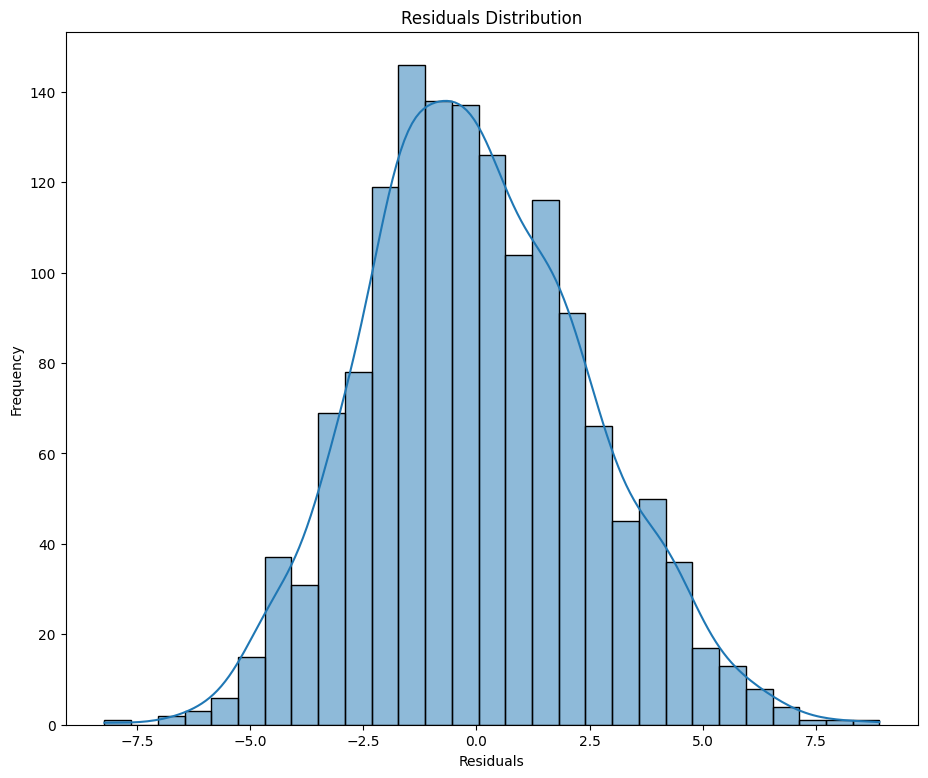

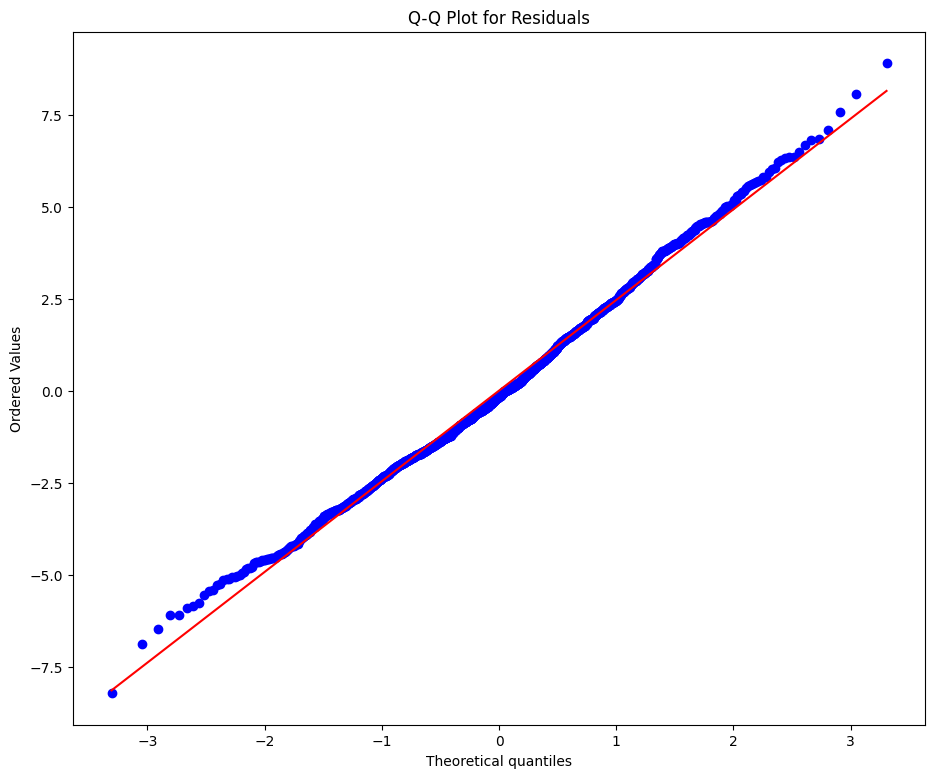

In [197]:
from scipy.stats import probplot
sns.histplot(fit_model.resid, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

# Q-Q plot
probplot(fit_model.resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()

In [160]:
jb_stat, jb_p_value, _, _ = jarque_bera(fit_model.resid)
print(f"Jarque-Bera Test Statistic: {jb_stat}")
print(f"P-value: {jb_p_value}")

Jarque-Bera Test Statistic: 13.796025983400762
P-value: 0.0010097898978488327


### Inference on Tripple Exponential Smoothing:
> The **MSE** value obtained with Tripple Exponential Smoothing is **11.058754236758848**.

# Check ACF and PACF

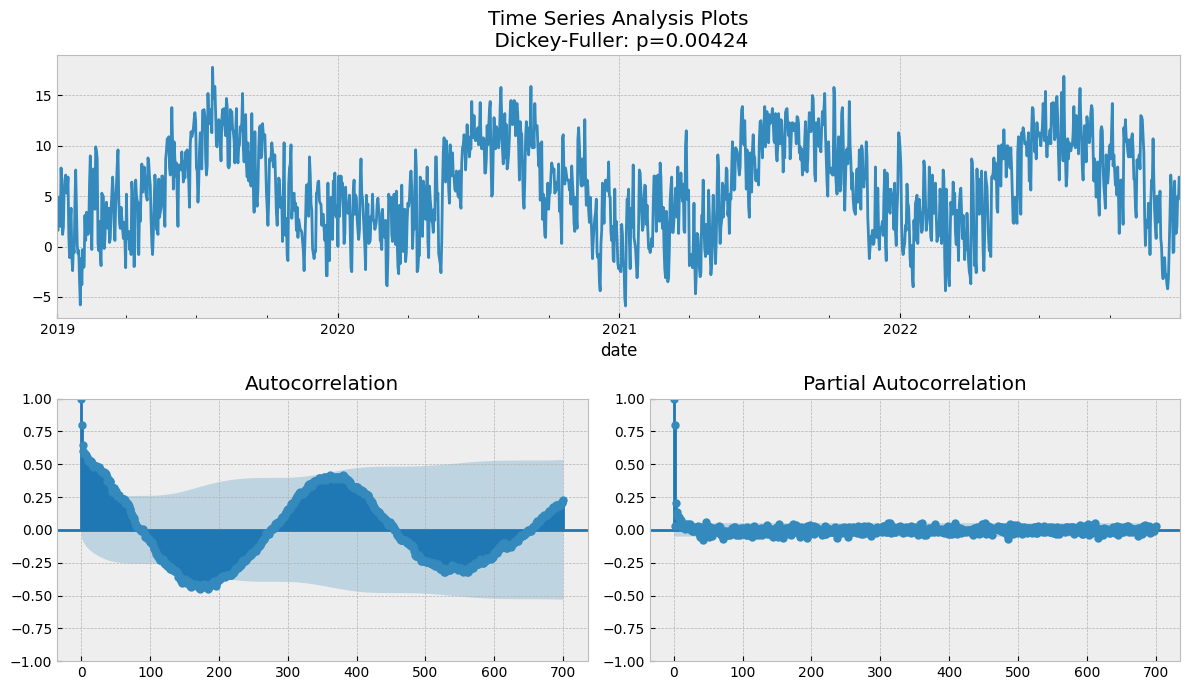

In [38]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(train['mintp'].dropna(), lags=700)

In [39]:
#train_diff = train.mintp - train.mintp.shift(365)
train_diff = train.diff(periods=365).copy()

#### Just for Checking Rolling mean - we get diff

In [124]:
rolling_mean_new = rolling_mean.diff().diff().dropna()

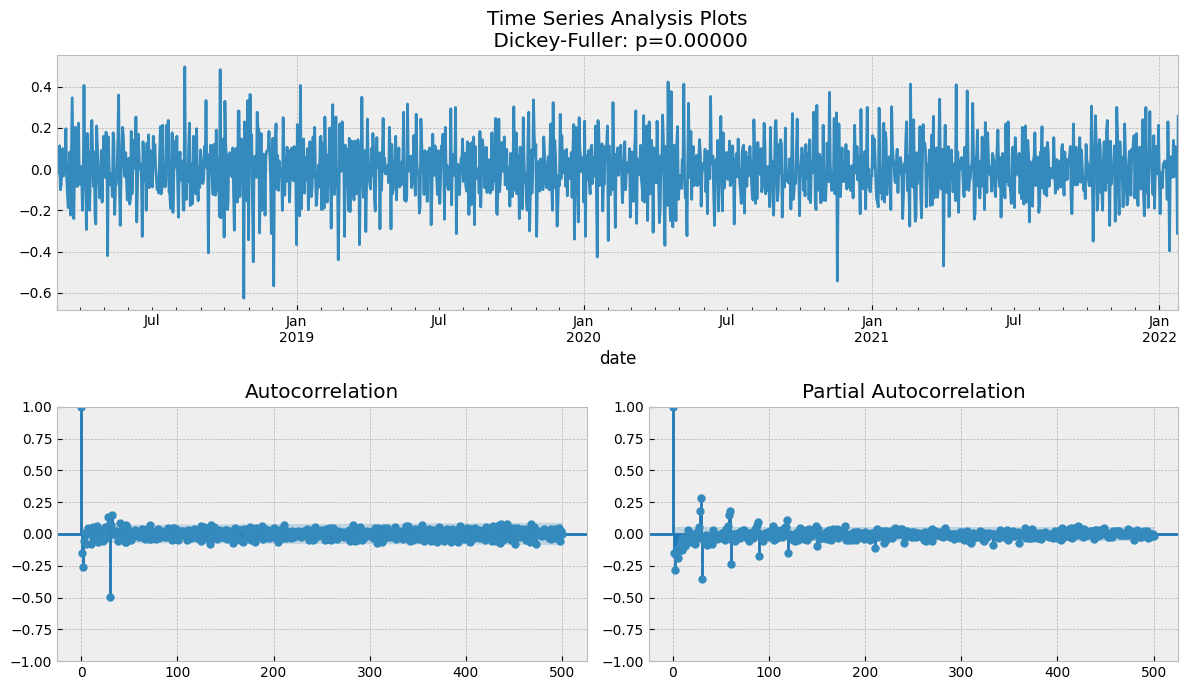

In [125]:
tsplot(rolling_mean_new[-1765:-340],lags=500)

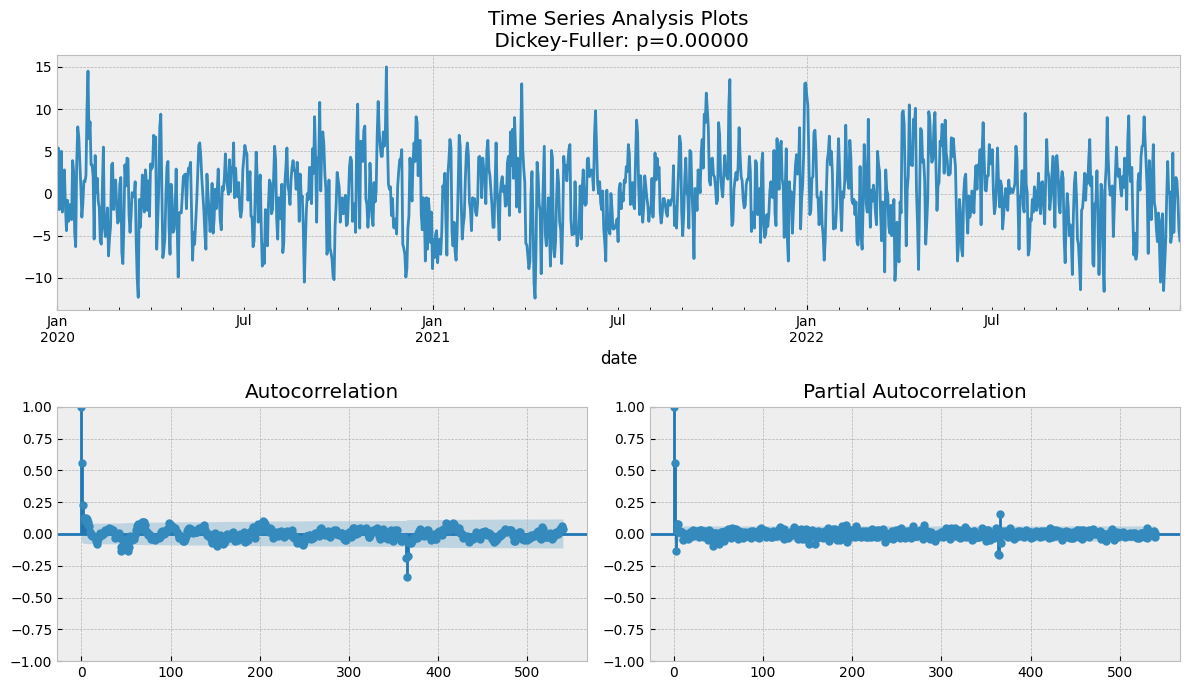

In [40]:
tsplot(train_diff['mintp'].dropna(), lags = 540)

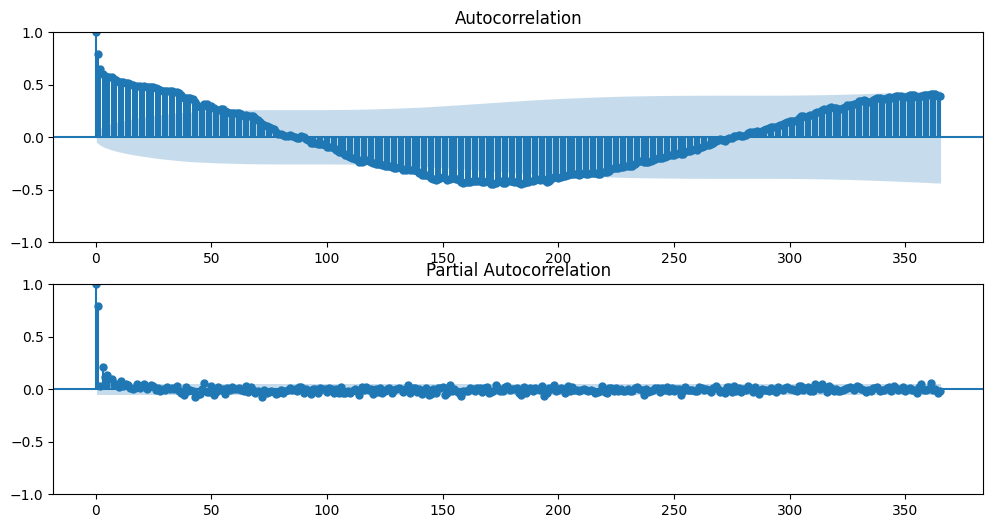

In [52]:

# Step 3: Plot ACF and PACF for diagnostic checks
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(train['mintp'].dropna(), ax=plt.gca(), lags=365)
plt.subplot(212)
plot_pacf(train['mintp'].dropna(), ax=plt.gca(), lags=365)
plt.show()

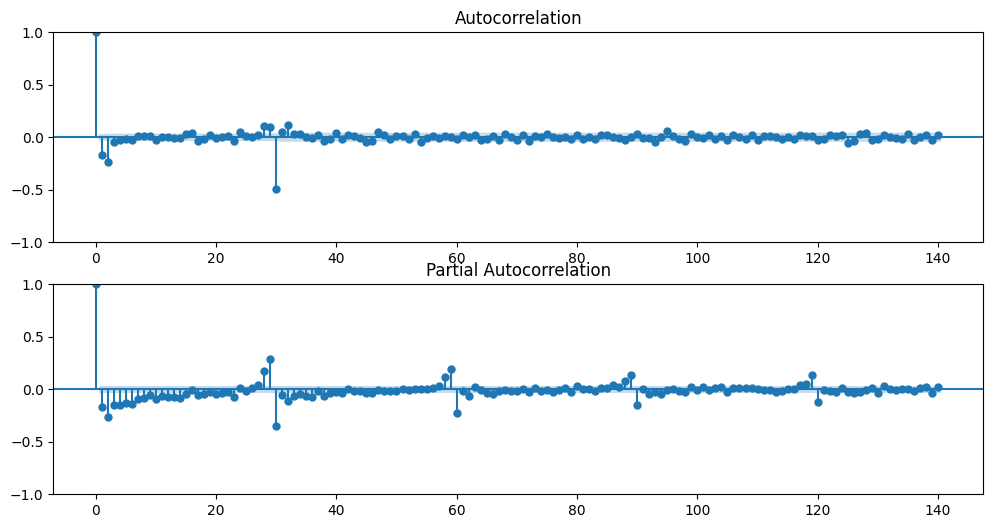

In [86]:

# Step 3: Plot ACF and PACF for diagnostic checks
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(rolling_mean_new.dropna(), ax=plt.gca(), lags=140)
plt.subplot(212)
plot_pacf(rolling_mean_new.dropna(), ax=plt.gca(), lags=140)
plt.show()

# ACF and PACF Inference:
- As we can see above that after differencing and dropping the null values from the dataset the *PACF(Partial Auto-Correlation Function)* plot has multiple spikes that are out of significant limit but however The first spike is the most significantly out of the limit but after the second spike every other spike are becoming insignificant and hence we can conclude that the **p** value for ARIMA testing can be considered as **2** or we can say the **MA** value is **2**.
- Now from the *ACF(Auto-Correlation Function)* plot we can conclude that after first order differencing there is only one spike that is significantly beyond the significant limit, but after second spike the others are becoming insignificant. Thus the **q** value or the **AR** value can also be considered to be **2**.
- And last but not least the differencing order is obviously 2 as that's the most differencing we implement in our dataset here, so **d** value is taken **2**.

# ARIMA

Mean Squared Error: 38.57193450718992


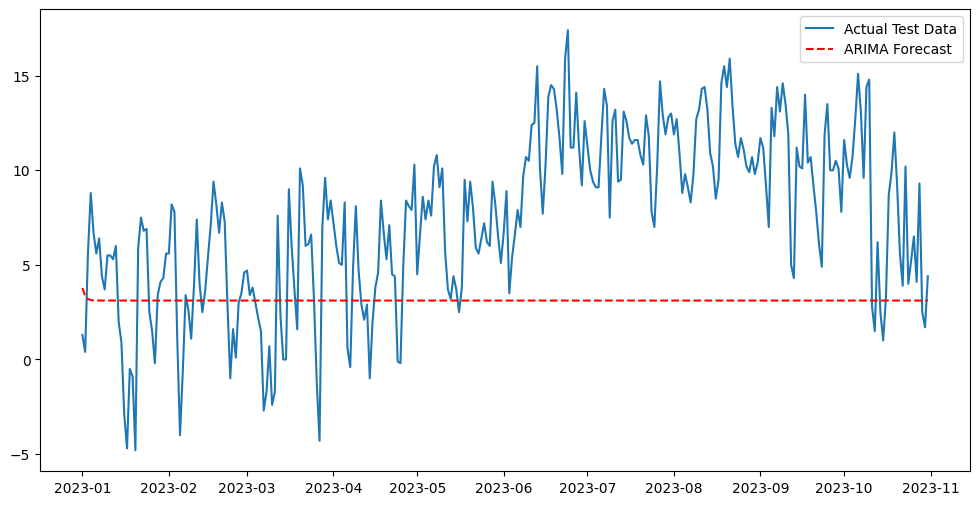

In [62]:
from statsmodels.tsa.arima.model import ARIMA
# Step 4: ARIMA
# Choose the lag order based on the ACF and PACF plots
p = 2 # Specify the lag order for AR
d = 1  # Differencing order
q = 2 # Specify the lag order for MA


arima_model = ARIMA(train['mintp'], order=(p, d, q))
fit_arima = arima_model.fit()


# Step 5: Forecast using ARIMA
forecast_values = fit_arima.forecast(steps=len(test['mintp']))

# Step 6: Evaluate the model (you can use any appropriate evaluation metric)
mse = ((forecast_values - test['mintp'])**2).mean()
print(f'Mean Squared Error: {mse}')

# Step 7: Plot the results
plt.figure(figsize=(12, 6))
#plt.plot(train['mintp'], label='Training Data')
plt.plot(test['mintp'], label='Actual Test Data')
plt.plot(test.index, forecast_values, label='ARIMA Forecast', linestyle='--', color='red')
plt.legend()
plt.show()

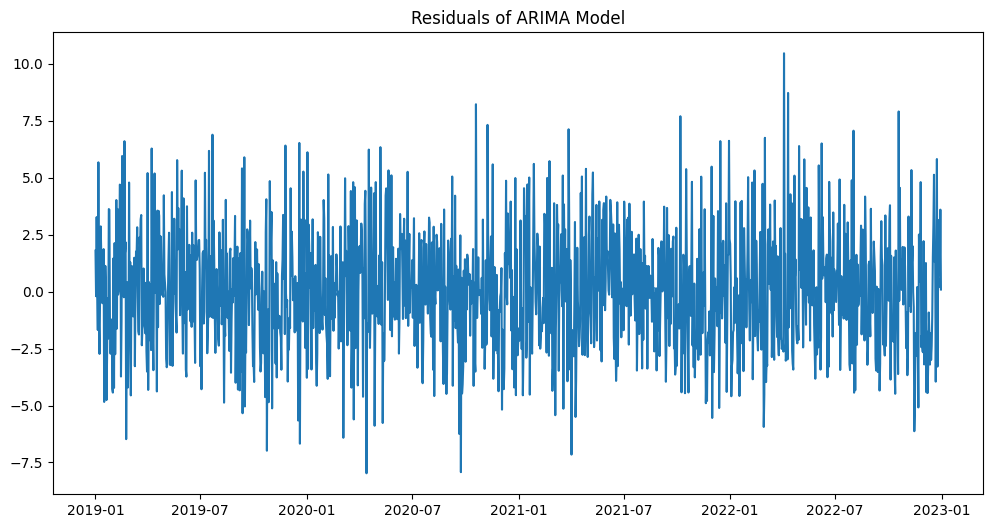

      lb_stat  lb_pvalue
1    0.000019   0.996518
2    0.003277   0.998363
3    0.029501   0.998664
4    0.214809   0.994629
5    0.525201   0.991171
6    0.527731   0.997484
7    2.169200   0.949885
8    2.206508   0.974017
9    2.366936   0.984250
10   5.465658   0.857984
11   5.476852   0.905896
12   5.531956   0.937817
13   5.696735   0.956497
14   6.002719   0.966423
15   6.019896   0.979412
16   6.417202   0.982930
17   9.792748   0.912076
18   9.792957   0.938455
19   9.958308   0.953967
20  10.474532   0.958729


In [47]:
plt.figure(figsize=(12, 6))
plt.plot(fit_arima.resid)
plt.title('Residuals of ARIMA Model')
plt.show()

# Perform Ljung-Box test for autocorrelation in residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test_result = acorr_ljungbox(fit_arima.resid, lags=20)
print(lb_test_result)

In [57]:
rolling_mean_new

date
2013-12-14    0.806667
2013-12-15    0.690000
2013-12-16    0.466667
2013-12-17    0.323333
2013-12-18    0.466667
                ...   
2023-10-27   -1.200000
2023-10-28   -1.013333
2023-10-29   -1.090000
2023-10-30   -1.276667
2023-10-31   -1.560000
Name: mintp, Length: 3609, dtype: float64

In [ ]:
rolling_mean_new.plot()

# SARIMA

In [59]:
import itertools
import time
from tqdm import tqdm_notebook

In [60]:
p_val = range(2, 5)
d=1 
q_val = range(2, 5)
P_val = range(0, 3)
D=1 
Q_val = range(0, 2)
s = 12 # season length 
parameters = itertools.product(p_val, q_val, P_val, Q_val)
parameters_list = list(parameters)
len(parameters_list)

54

In [61]:
%%time
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(rolling_mean_new, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        current_aic = model.aic
        # saving best model, AIC and parameters
        if current_aic < best_aic:
            best_model = model
            best_aic = current_aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table
    

result_table = optimizeSARIMA(parameters_list, d, D, s)


  0%|          | 0/54 [00:00<?, ?it/s]

CPU times: total: 28min 33s
Wall time: 17min 43s


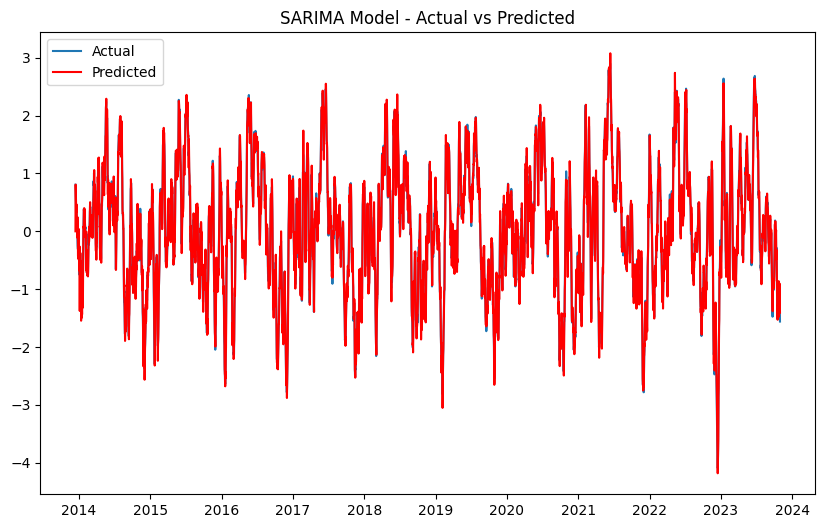

Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
Mean Absolute Error (MAE): 0.11


In [64]:
# Assuming you have the result_table from your optimization
best_params = result_table['parameters'][0]

# Fit SARIMA model with the best parameters
best_model = sm.tsa.statespace.SARIMAX(rolling_mean_new, order=(best_params[0], d, best_params[1]), 
                                       seasonal_order=(best_params[2], D, best_params[3], s)).fit(disp=-1)

# Get predictions on the training data
train_pred = best_model.predict(dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean_new, label='Actual')
plt.plot(train_pred, label='Predicted', color='red')
plt.title('SARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()

# Calculate accuracy metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(rolling_mean_new, train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(rolling_mean_new, train_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')


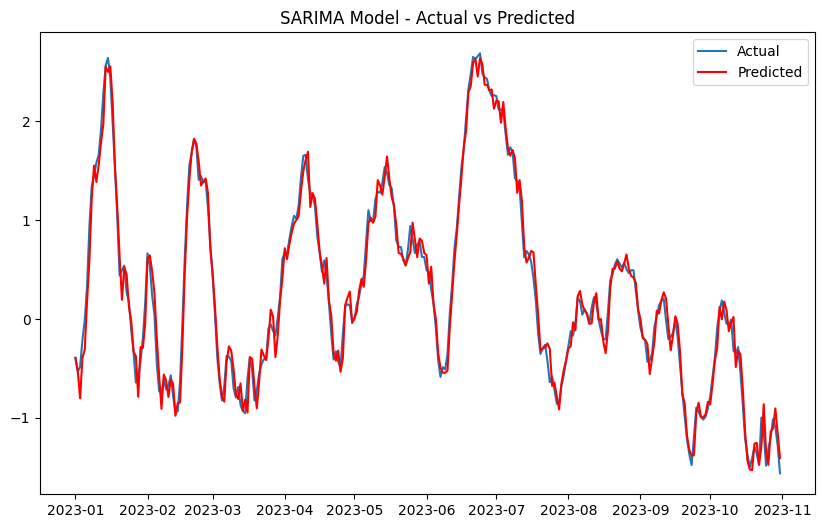

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean_new[-304:], label='Actual')
plt.plot(train_pred[-304:], label='Predicted', color='red')
plt.title('SARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()

date
2023-01-01   -0.396667
2023-01-02   -0.533333
2023-01-03   -0.483333
2023-01-04   -0.213333
2023-01-05   -0.013333
                ...   
2023-10-27   -1.200000
2023-10-28   -1.013333
2023-10-29   -1.090000
2023-10-30   -1.276667
2023-10-31   -1.560000
Name: mintp, Length: 304, dtype: float64

In [73]:
rolling_mean_new[-1765:-304]

date
2019-01-01    0.533333
2019-01-02    0.453333
2019-01-03    0.433333
2019-01-04    0.403333
2019-01-05    0.200000
                ...   
2022-12-27   -0.653333
2022-12-28   -0.496667
2022-12-29   -0.333333
2022-12-30   -0.150000
2022-12-31   -0.313333
Name: mintp, Length: 1461, dtype: float64

In [87]:
# Here now we define the ARIMA and SARIMA Orders
p_val = range(1, 4)
d=2 
q_val = range(1, 4)
P_val = range(0, 3)
D=2 
Q_val = range(0, 3)
s = 12 # season length 
parameters = itertools.product(p_val, q_val, P_val, Q_val)
parameters_list = list(parameters)
len(parameters_list)

81

In [88]:
%%time
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge so instead of failing we continue in except block
        try:
            model=sm.tsa.statespace.SARIMAX(rolling_mean_new[-1765:-304], order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        current_aic = model.aic
        # saving best model, AIC and parameters
        if current_aic < best_aic:
            best_model = model
            best_aic = current_aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is better, and lowest is best
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table
    

result_table = optimizeSARIMA(parameters_list, d, D, s)

  0%|          | 0/81 [00:00<?, ?it/s]

CPU times: total: 1h 24min 39s
Wall time: 40min 58s


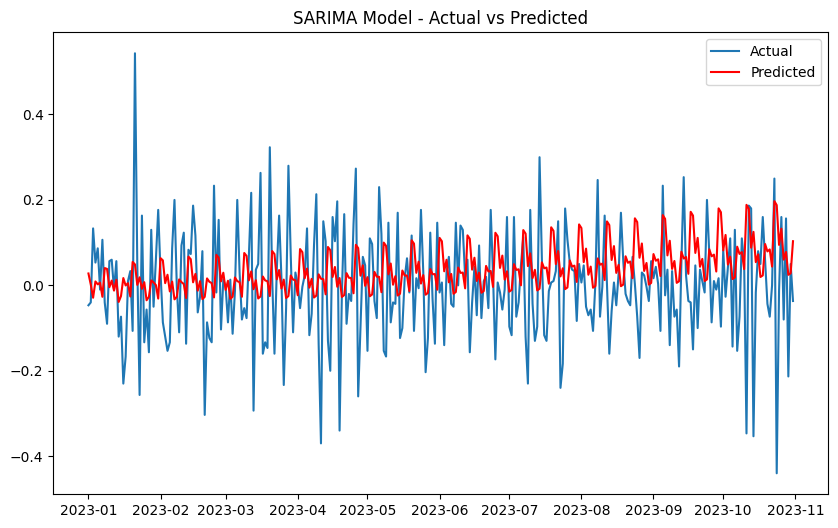

Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
Mean Absolute Error (MAE): 0.11


In [89]:
best_params = result_table['parameters'][0]

# Fit SARIMA model with the best parameters
best_model = sm.tsa.statespace.SARIMAX(rolling_mean_new[-1765:-304], order=(best_params[0], d, best_params[1]), 
                                       seasonal_order=(best_params[2], D, best_params[3], s)).fit(disp=-1)

# Get predictions on the test data
forecast_test = best_model.forecast(steps=len(test))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean_new[-304:], label='Actual')
plt.plot(forecast_test, label='Predicted', color='red')
plt.title('SARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()

# Calculate accuracy metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(rolling_mean_new[-304:], forecast_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(rolling_mean_new[-304:], forecast_test)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')


## SARIMAX Results

In [129]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   mintp   No. Observations:                 1461
Model:             SARIMAX(3, 2, 3)x(2, 2, [1, 2], 12)   Log Likelihood                 739.885
Date:                                 Sat, 30 Dec 2023   AIC                          -1457.770
Time:                                         03:28:46   BIC                          -1399.812
Sample:                                     01-01-2019   HQIC                         -1436.131
                                          - 12-31-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1431      0.027    -42.197      0.000      -1.196      -1.090
ar.L2         -0.4374      0.040    -10.962      0.000      -0.516      -0.359
ar.L3         -0.2565      0.027     -9.420      0.000      -0.310      -0.203
ma.L1         -0.9917      0.106     -9.384      0.000      -1.199      -0.785
ma.L2         -0.9994      0.210     -4.758      0.000      -1.411      -0.588
ma.L3          0.9917      0.106      9.364      0.000       0.784       1.199
ar.S.L12      -0.0651      0.033     -1.975      0.048      -0.130      -0.000
ar.S.L24      -0.0415      0.030     -1.379      0.168      -0.101       0.018
ma.S.L12      -1.8612      0.022    -85.412      0.000      -1.904      -1.818
ma.S.L24       0.8659      0.022     39.950      0.000       0.823       0.908
sigma2         0.0189      0.002      9.121      0.000       0.015       0.023
===================================================================================
Ljung-Box (L1) (Q):                   3.81   Jarque-Bera (JB):                 3.99
Prob(Q):                              0.05   Prob(JB):                         0.14
Heteroskedasticity (H):               0.90   Skew:                             0.03
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Diagnostic - Ljung-Box Test

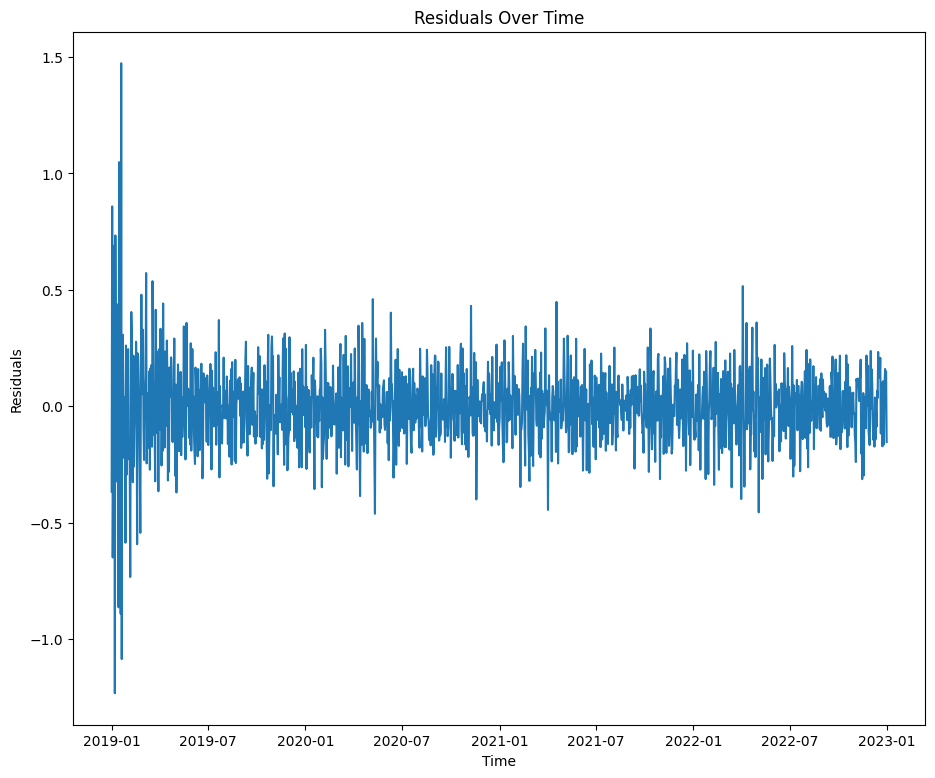

In [193]:
plt.plot(best_model.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals Over Time')
plt.show()

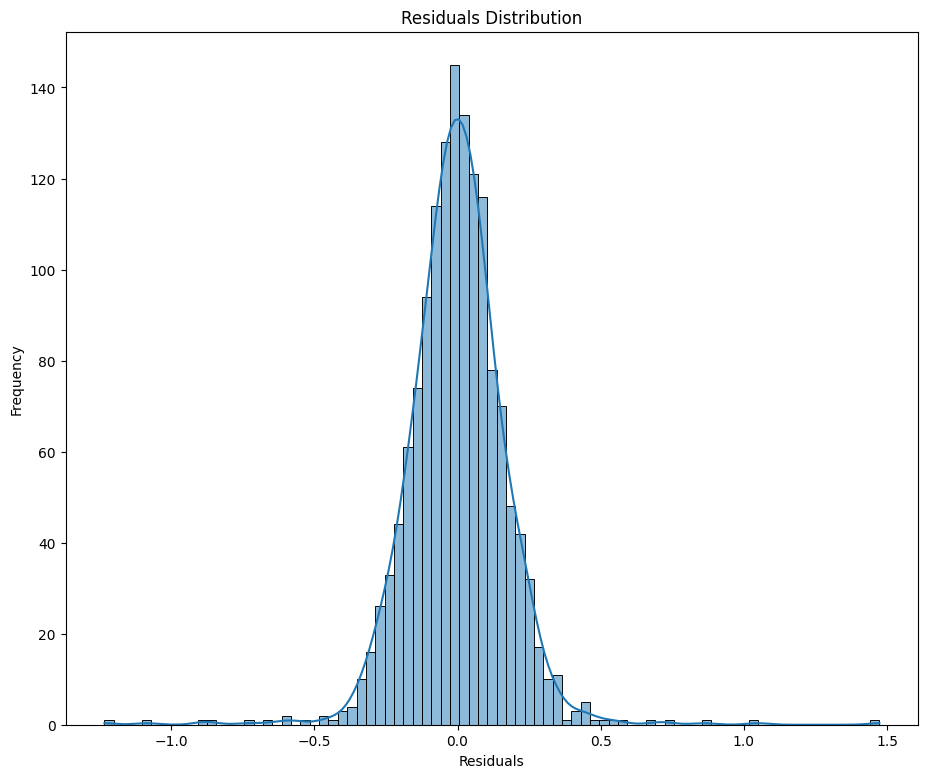

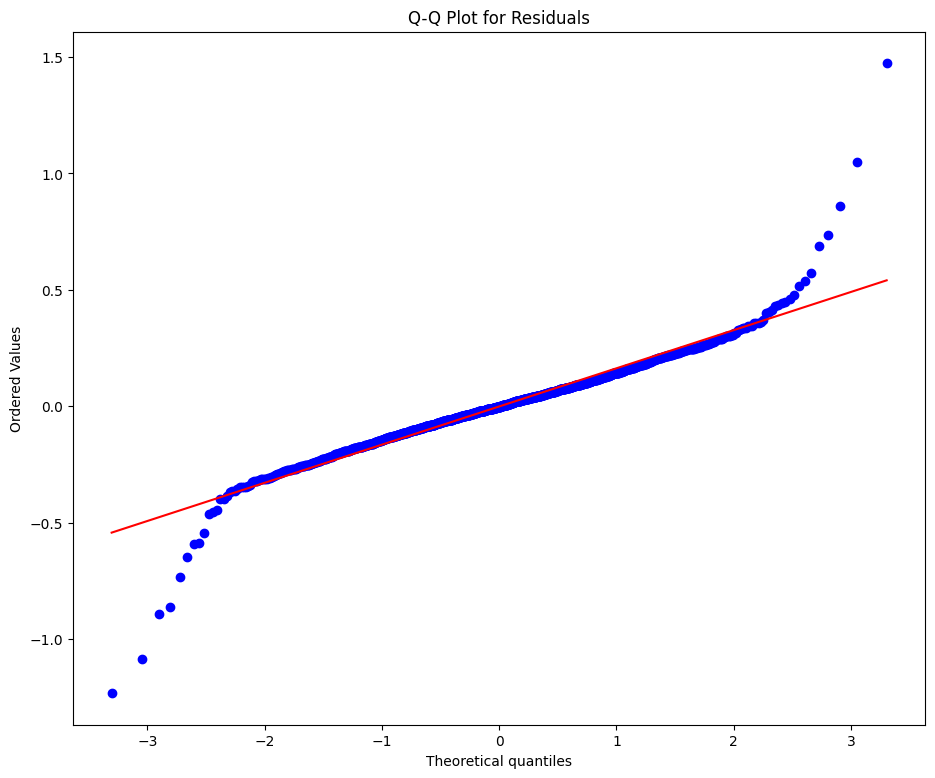

In [198]:
from scipy.stats import probplot
sns.histplot(best_model.resid, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

# Q-Q plot
probplot(best_model.resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()

# Part B - Logistic Regression

## Cardiac Dataset

In [91]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [92]:
cardiac_df = pd.read_csv('Data files for TABA-20231221/cardiac.csv')

In [93]:
cardiac_df

caseno  age  weight  gender  fitness_score cardiac_condition
0        1   37   70.47    Male          55.79            Absent
1        2   73   50.34  Female          35.00            Absent
2        3   46   87.65    Male          42.93           Present
3        4   36   89.80  Female          28.30           Present
4        5   34  103.02    Male          40.56            Absent
..     ...  ...     ...     ...            ...               ...
95      96   42  111.98    Male          33.73           Present
96      97   43   88.07    Male          49.22           Present
97      98   45   94.07    Male          41.97           Present
98      99   58   97.46    Male          35.20           Present
99     100   61   93.76    Male          32.00           Present

[100 rows x 6 columns]

In [94]:
cardiac_df.isna().sum()

caseno               0
age                  0
weight               0
gender               0
fitness_score        0
cardiac_condition    0
dtype: int64

## Inference on null value check: 
There are no null values present in the dataset

# Numerical / Non numerical data checkpoint

In [95]:
cardiac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   caseno             100 non-null    int64  
 1   age                100 non-null    int64  
 2   weight             100 non-null    float64
 3   gender             100 non-null    object 
 4   fitness_score      100 non-null    float64
 5   cardiac_condition  100 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


## Inference on checkpoint:

The features gender and cardiac condition are categorical and non numerical. They need to be converted to numerical and the categorical features needs to be retained.

In [96]:
cardiac_df['cardiac_condition'].value_counts()

cardiac_condition
Absent     65
Present    35
Name: count, dtype: int64

In [97]:
label_encoder = LabelEncoder()

# Fit and transform the categorical column
cardiac_df['gender'] = label_encoder.fit_transform(cardiac_df['gender'])
cardiac_df['cardiac_condition'] = label_encoder.fit_transform(cardiac_df['cardiac_condition'])

In [98]:
cardiac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   caseno             100 non-null    int64  
 1   age                100 non-null    int64  
 2   weight             100 non-null    float64
 3   gender             100 non-null    int32  
 4   fitness_score      100 non-null    float64
 5   cardiac_condition  100 non-null    int32  
dtypes: float64(2), int32(2), int64(2)
memory usage: 4.0 KB


In [99]:
cardiac_df.head()

caseno  age  weight  gender  fitness_score  cardiac_condition
0       1   37   70.47       1          55.79                  0
1       2   73   50.34       0          35.00                  0
2       3   46   87.65       1          42.93                  1
3       4   36   89.80       0          28.30                  1
4       5   34  103.02       1          40.56                  0

# Checking Class Imbalance:

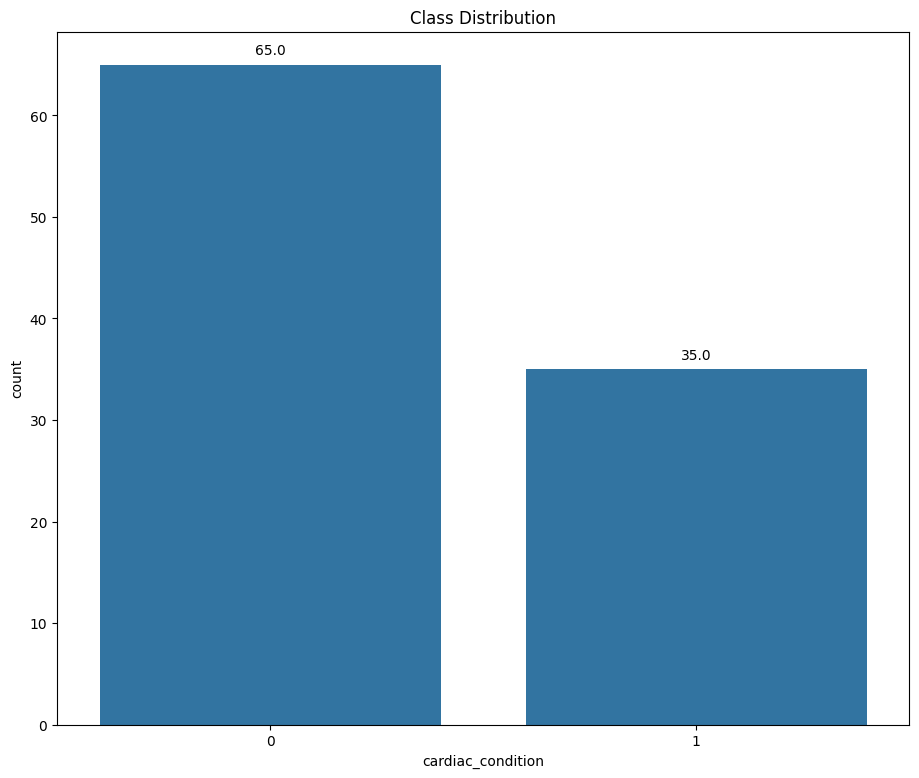

In [100]:
ax = sns.countplot(x='cardiac_condition', data=cardiac_df)
plt.title('Class Distribution')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

## Correlation Matrix

<Axes: >

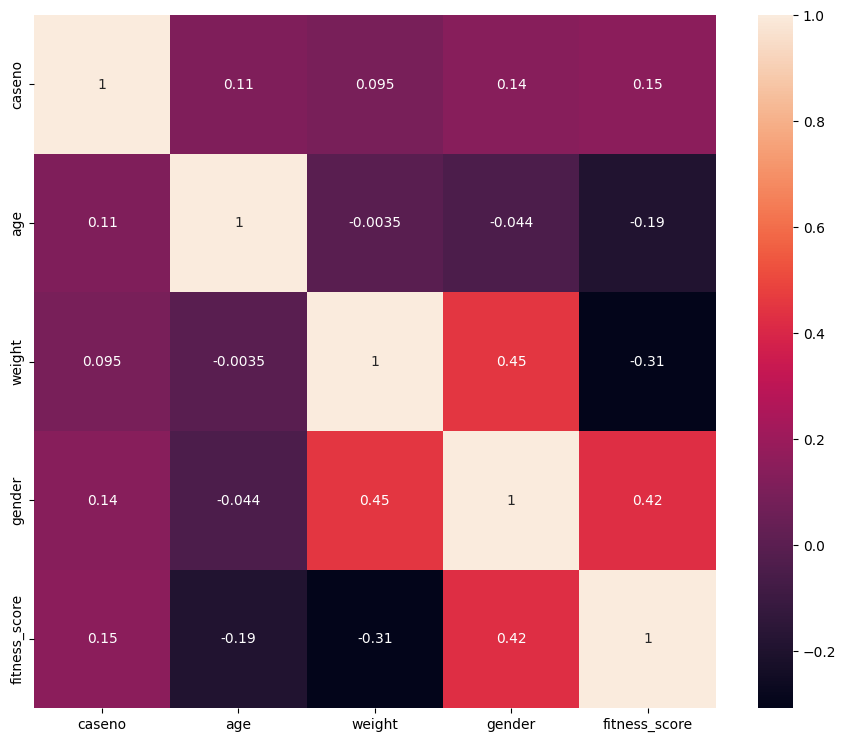

In [101]:
sns.heatmap(cardiac_df.drop(['cardiac_condition'],axis=1).corr(),annot=True)

# Histplots

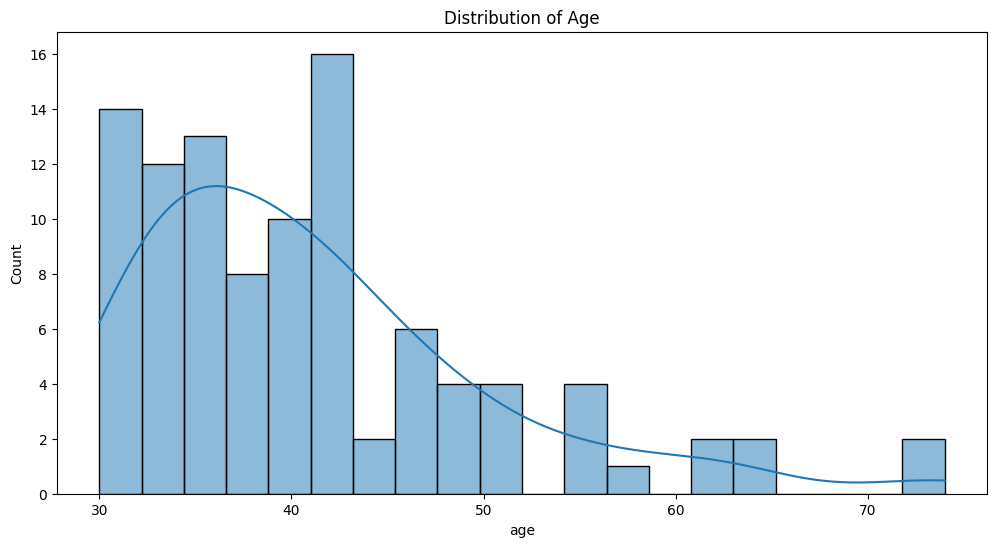

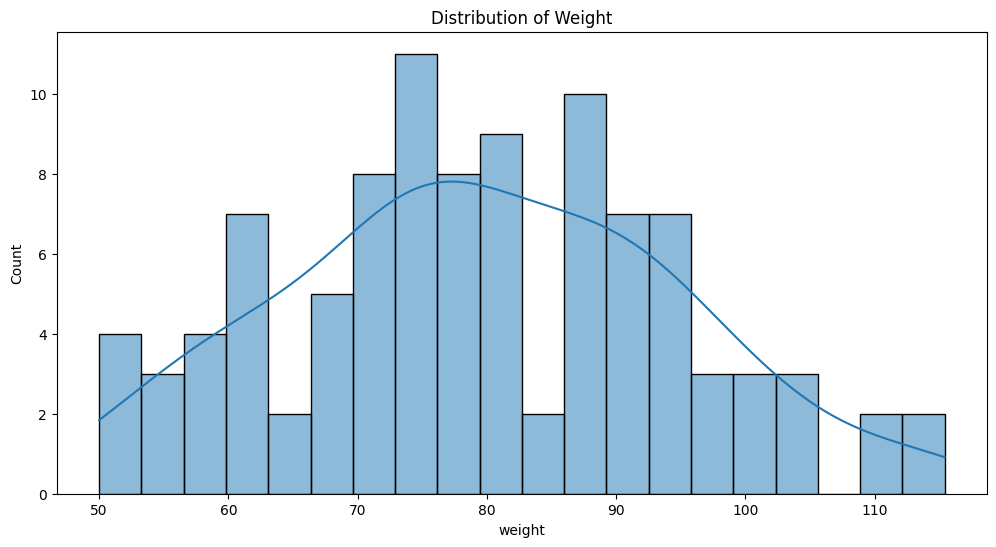

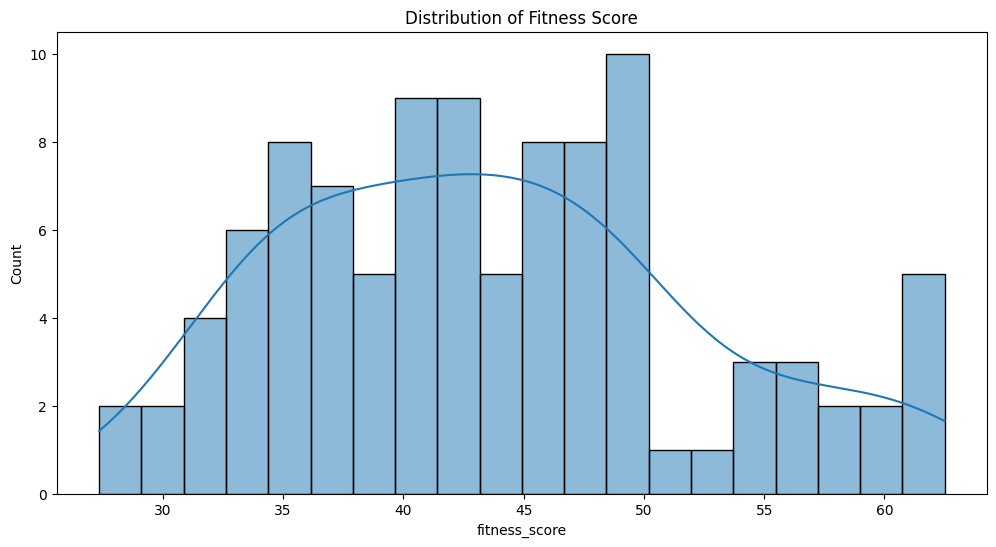

In [102]:
plt.figure(figsize=(12, 6))
sns.histplot(cardiac_df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(cardiac_df['weight'], bins=20, kde=True)
plt.title('Distribution of Weight')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(cardiac_df['fitness_score'], bins=20, kde=True)
plt.title('Distribution of Fitness Score')
plt.show()


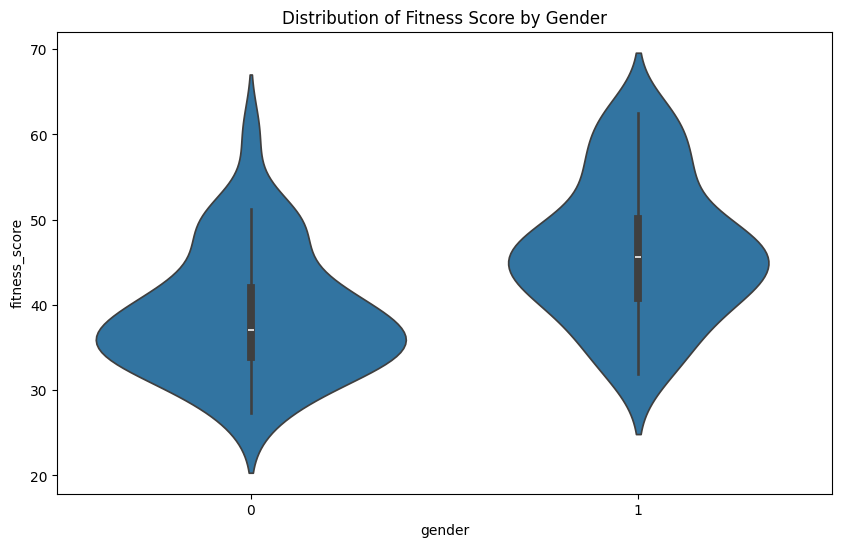

In [103]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='fitness_score', data=cardiac_df)
plt.title('Distribution of Fitness Score by Gender')
plt.show()

# Data Preparation
## Drop Caseno column 

In [200]:
cardiac_df.drop('caseno', axis=1,inplace=True)

## Lets check the imbalance ratio

In [104]:
class_imbalance_ratio = cardiac_df['cardiac_condition'].value_counts(normalize=True)

# Display class imbalance ratio
print("Class Imbalance Ratio:")
print(class_imbalance_ratio)

Class Imbalance Ratio:
cardiac_condition
0    0.65
1    0.35
Name: proportion, dtype: float64


## Lets handle the imbalance:

### Normalization is included using Standard Scaler functionality.

In [105]:
X = cardiac_df.drop('cardiac_condition', axis=1)
y = cardiac_df['cardiac_condition']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split the data into training and testing sets using student ID as seed
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=23112573)

# Here we assign a balanced class weights to all the classes in target
class_labels = y.unique()
class_weights = dict(zip(class_labels, compute_class_weight(class_weight='balanced',classes=class_labels, y=y)))

# Now we train a Logistic Regression model with class weights
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Accuracy
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8000


In [106]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Calculate class weights
class_labels = y.unique()
class_weights = dict(zip(class_labels, compute_class_weight(class_weight='balanced',classes=class_labels, y=y_train)))

# Create and train a Logistic Regression model without handling imbalance
model_unbalanced = LogisticRegression()
model_unbalanced.fit(X_train, y_train)

# Create and train a Logistic Regression model with random oversampling
model_over = LogisticRegression()
model_over.fit(X_train_over, y_train_over)

# Create and train a Logistic Regression model with random undersampling
model_under = LogisticRegression()
model_under.fit(X_train_under, y_train_under)

# Create and train a Logistic Regression model with class weights
model_weighted = LogisticRegression(class_weight=class_weights)
model_weighted.fit(X_train, y_train)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

print("Evaluation on Unbalanced Data:")
evaluate_model(model_unbalanced, X_test, y_test)

print("\nEvaluation after Random Oversampling:")
evaluate_model(model_over, X_test, y_test)

print("\nEvaluation after Random Undersampling:")
evaluate_model(model_under, X_test, y_test)

print("\nEvaluation with Class Weights:")
evaluate_model(model_weighted, X_test, y_test)

Evaluation on Unbalanced Data:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.67      0.67      0.67         6

    accuracy                           0.80        20
   macro avg       0.76      0.76      0.76        20
weighted avg       0.80      0.80      0.80        20


Evaluation after Random Oversampling:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.71      0.83      0.77         6

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20


Evaluation after Random Undersampling:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.62      0.83      0.71         6

    accuracy                           0.80        20
   macro avg      

In [107]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.4f}')
    
print("Evaluation on Unbalanced Data:")
evaluate_model(model_unbalanced, X_test, y_test)

print("\nEvaluation after Random Oversampling:")
evaluate_model(model_over, X_test, y_test)

print("\nEvaluation after Random Undersampling:")
evaluate_model(model_under, X_test, y_test)

print("\nEvaluation with Class Weights:")
evaluate_model(model_weighted, X_test, y_test)

Evaluation on Unbalanced Data:
Accuracy: 0.8000

Evaluation after Random Oversampling:
Accuracy: 0.8500

Evaluation after Random Undersampling:
Accuracy: 0.8000

Evaluation with Class Weights:
Accuracy: 0.8000


In [108]:
def evaluate_model_conf(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(pd.DataFrame(conf_matrix))
    # Display count of predictions for each class
    #for i, class_count in enumerate(conf_matrix):
    #    print(f"Class {i} Predictions: {class_count}")
    
print("Evaluation on Unbalanced Data:")
evaluate_model_conf(model_unbalanced, X_test, y_test)

print("\nEvaluation after Random Oversampling:")
evaluate_model_conf(model_over, X_test, y_test)

print("\nEvaluation after Random Undersampling:")
evaluate_model_conf(model_under, X_test, y_test)

print("\nEvaluation with Class Weights:")
evaluate_model_conf(model_weighted, X_test, y_test)


Evaluation on Unbalanced Data:
    0  1
0  12  2
1   2  4

Evaluation after Random Oversampling:
    0  1
0  12  2
1   1  5

Evaluation after Random Undersampling:
    0  1
0  11  3
1   1  5

Evaluation with Class Weights:
    0  1
0  11  3
1   1  5


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.pipeline import Pipeline

# Initial Model and Results

In [110]:
# First we create a Pipeline for Logistic Regression
lr_pipeline = Pipeline([
    ('oversampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
    ('model', LogisticRegression())
])

# Hyperparameters to tune are defined here
param_grid_lr = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2']
}

# Perform grid search
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Let's check the best hyperparameters hyperparameters
print("Best Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Model Evaluation with best hyperparameters
evaluate_model(grid_search_lr.best_estimator_, X_test, y_test)


Best Hyperparameters for Logistic Regression:
{'model__C': 1, 'model__penalty': 'l2'}
Accuracy: 0.8500


# Outliers Handling

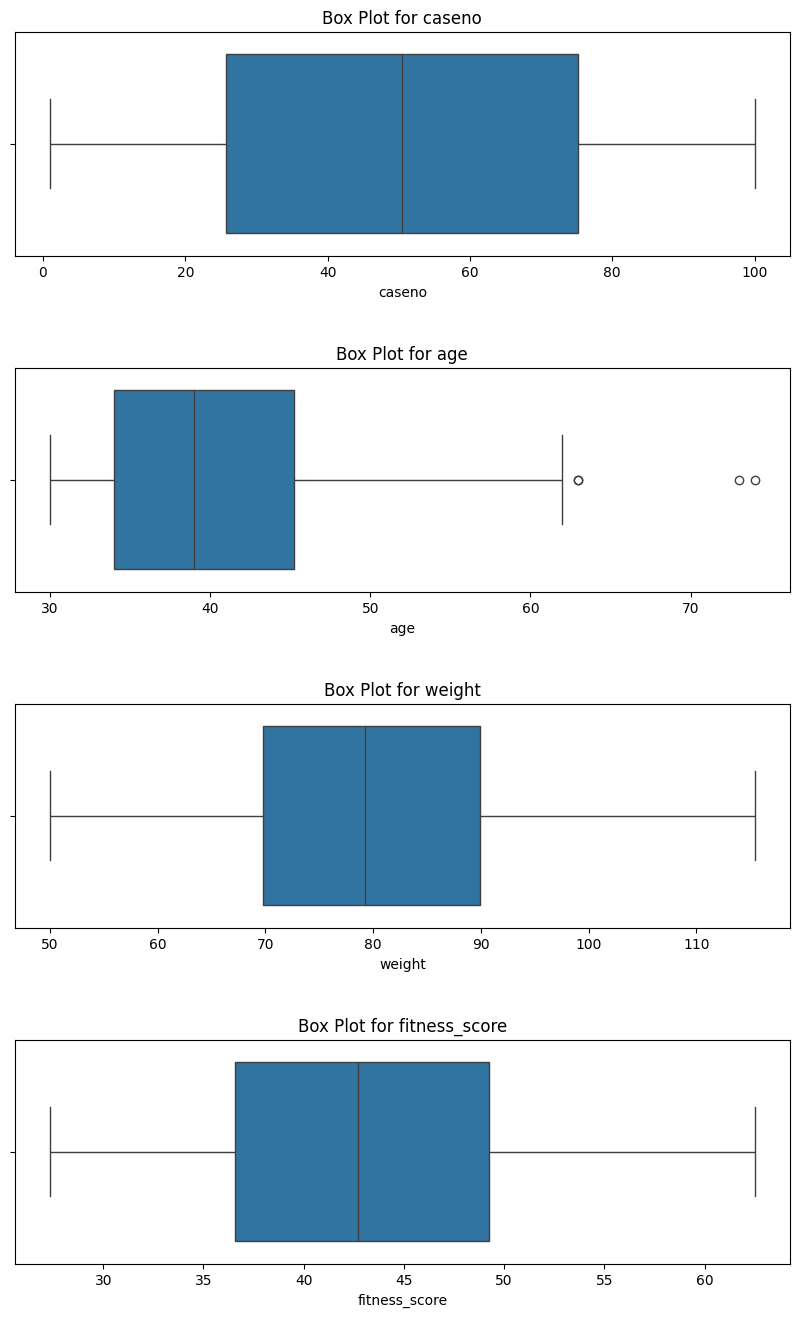

In [111]:
numerical_columns = cardiac_df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col != 'cardiac_condition']


fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 4 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.5)

# Box plots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=cardiac_df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}')

plt.show()

### Inference on Outliers:
Only age has outliers. Lets remove them and check if the imbalance is effected too much

In [112]:
outlier_df = cardiac_df.copy()

Q1 = outlier_df['age'].quantile(0.25)
Q3 = outlier_df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (outlier_df['age'] < lower_bound) | (outlier_df['age'] > upper_bound)

# Handle outliers by replacing them with the median
median_value = outlier_df['age'].median()
outlier_df.loc[outliers, 'age'] = median_value

# Now we print the count of outliers and the modified DataFrame 
print(f"Number of outliers in {'age'}: {outliers.sum()}")
print("\nDataFrame after handling outliers:")
print(outlier_df)

Number of outliers in age: 4

DataFrame after handling outliers:
    caseno  age  weight  gender  fitness_score  cardiac_condition
0        1   37   70.47       1          55.79                  0
1        2   39   50.34       0          35.00                  0
2        3   46   87.65       1          42.93                  1
3        4   36   89.80       0          28.30                  1
4        5   34  103.02       1          40.56                  0
..     ...  ...     ...     ...            ...                ...
95      96   42  111.98       1          33.73                  1
96      97   43   88.07       1          49.22                  1
97      98   45   94.07       1          41.97                  1
98      99   58   97.46       1          35.20                  1
99     100   61   93.76       1          32.00                  1

[100 rows x 6 columns]


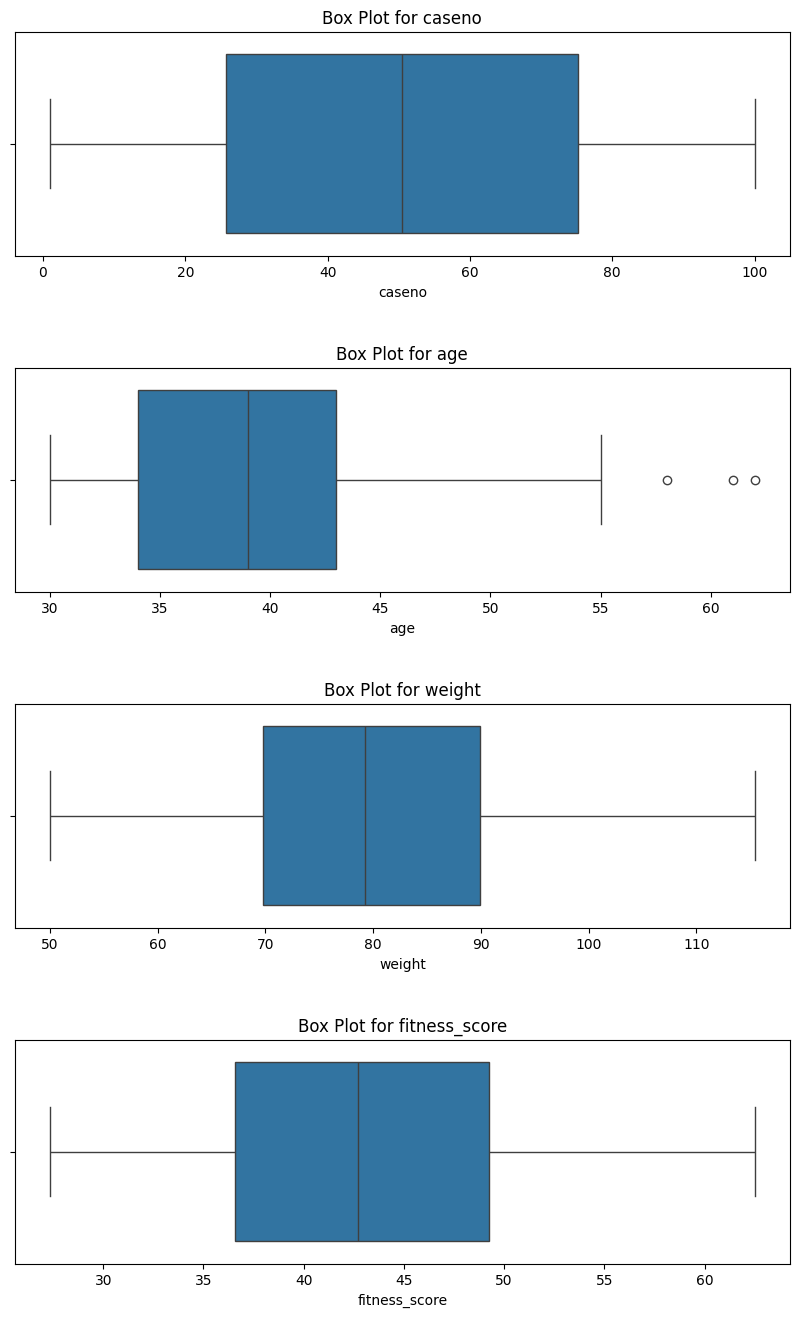

In [113]:
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 4 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=outlier_df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}')

plt.show()

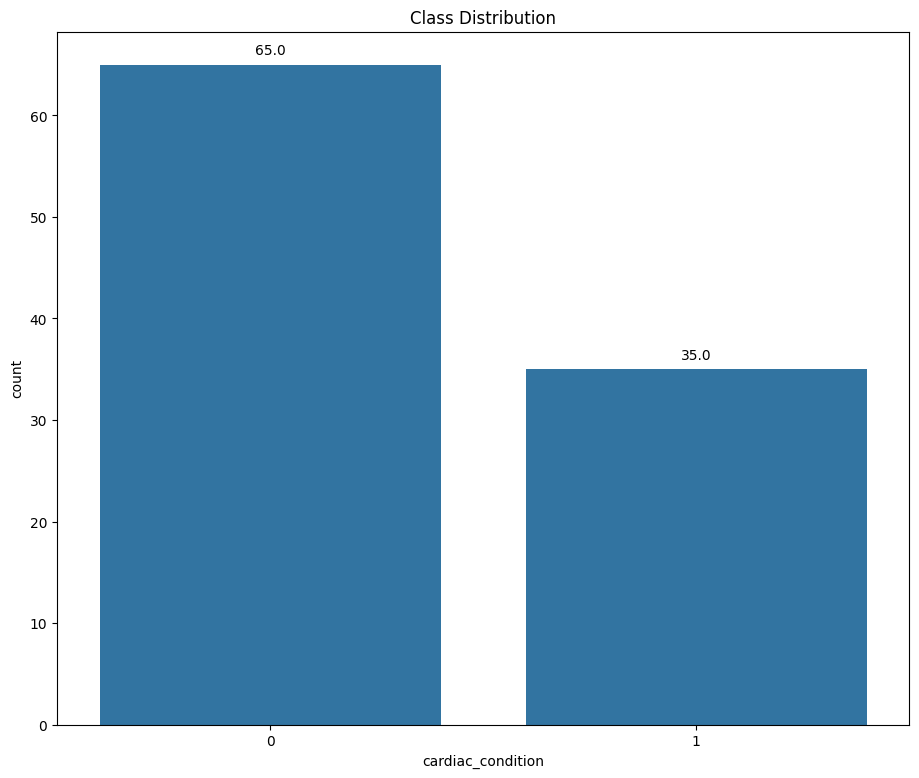

In [114]:
# Re-checking Class Imbalance:
ax = sns.countplot(x='cardiac_condition', data=outlier_df)
plt.title('Class Distribution')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [115]:
X = outlier_df.drop('cardiac_condition', axis=1)
y = outlier_df['cardiac_condition']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split the data into training and testing sets using student ID as the seed.
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=23112573)

# Intermediate Model Results:

In [116]:
# Pipeline for Logistic Regression
lr_pipeline = Pipeline([
    ('oversampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
    ('model', LogisticRegression())
])

# Hyperparameters to tune are defined below
param_grid_lr = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2']
}

# Next we perform Grid search CV to identify the best parameters
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Best hyperparameters are identified now
print("Best Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Let's check the Model Evaluation with the best hyperparameters
evaluate_model(grid_search_lr.best_estimator_, X_test, y_test)

Best Hyperparameters for Logistic Regression:
{'model__C': 100, 'model__penalty': 'l2'}
Accuracy: 0.9000


In [117]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("Explained Variance Ratio for Each Principal Component:")
print(explained_variance_ratio)

print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Explained Variance Ratio for Each Principal Component:
[0.3163047  0.27672546 0.20616515 0.16195367 0.03885102]

Cumulative Explained Variance:
[0.3163047  0.59303016 0.79919531 0.96114898 1.        ]


In [118]:


# Find the number of components to retain 95% or more variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print("Cumulative Explained Variance for Each Component:")
print(cumulative_explained_variance)

print("\nNumber of Components to Retain 95% or More Variance:", n_components_95)

Cumulative Explained Variance for Each Component:
[0.3163047  0.59303016 0.79919531 0.96114898 1.        ]

Number of Components to Retain 95% or More Variance: 4


### So now that we know that we can retain 95% of the variance using 4 PCA components, let's do that for the final modelling

# Final Model results:

In [201]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


pca_lr_pipeline = Pipeline([
    ('pca', PCA()),
    ('model', LogisticRegression())
])

# Step 4: Define hyperparameters to tune
param_grid_pca_lr = {
    'pca__n_components': [2, 3, 4, 5],  # Adjust the number of components as needed
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2']
}

# Step 5: Perform grid search
grid_search_pca_lr = GridSearchCV(pca_lr_pipeline, param_grid_pca_lr, cv=5, scoring='accuracy')
lr_fit_model = grid_search_pca_lr.fit(X_train, y_train)

# Step 6: Display best hyperparameters
print("Best Hyperparameters for PCA and Logistic Regression:")
print(grid_search_pca_lr.best_params_)

y_pred_pca_lr = grid_search_pca_lr.best_estimator_.predict(X_test)

# Evaluate the model with best hyperparameters
evaluate_model(grid_search_lr.best_estimator_, X_test, y_test)


Best Hyperparameters for PCA and Logistic Regression:
{'model__C': 10, 'model__penalty': 'l2', 'pca__n_components': 5}
Accuracy: 0.9000


# Final Inference and Model Summary
However there isn't much change in the result. We have achieved 90% accuracy here.

In [205]:
best_lr_model = grid_search_pca_lr.best_estimator_

# Display coefficients if the selected model is Logistic Regression
if isinstance(best_lr_model.named_steps['model'], LogisticRegression):
    coefficients = best_lr_model.named_steps['model'].coef_
    intercept = best_lr_model.named_steps['model'].intercept_
    print("Logistic Regression Coefficients:")
    print("Coefficients:", coefficients)
    print("Intercept:", intercept)

# Display classification report on the test set
y_pred_pca_lr = best_lr_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_pca_lr))

Logistic Regression Coefficients:
Coefficients: [[-0.37952293  0.98496668 -0.11978653 -0.72096067 -0.84565916]]
Intercept: [-0.70195248]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.67      0.80         6

    accuracy                           0.90        20
   macro avg       0.94      0.83      0.87        20
weighted avg       0.91      0.90      0.89        20

